######LSTM ###

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [3]:
# Define dataset paths
dataset_files = {
    "HDFC": "HDFC.csv",
    "SBI": "SBI.csv",
    "TATAMOTORS": "TAMO.csv",
    "COAL": "COAL.csv"
}

# Dictionary to store processed data & scalers
stock_data = {}
scalers = {}

# Load & preprocess each stock dataset
for stock, file_path in dataset_files.items():
    print(f"📥 Loading dataset for {stock}...")

    df = pd.read_csv(file_path)

    # Convert Date to datetime & sort
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    df.sort_values(by='Date', inplace=True)

    # Ensure 'Close' Column Exists (Rename if needed)
    if "Price" in df.columns and "Close" not in df.columns:
        df.rename(columns={"Price": "Close"}, inplace=True)

    if "Close" not in df.columns:
        raise ValueError(f"❌ 'Close' column missing in {stock} dataset!")

    # Remove commas & convert to float
    df['Close'] = df['Close'].astype(str).str.replace(',', '').astype(float)

    # Normalize 'Close' prices
    scaler = MinMaxScaler(feature_range=(0, 1))
    df['Close_Scaled'] = scaler.fit_transform(df[['Close']])

    # Store processed data & scaler
    stock_data[stock] = df
    scalers[stock] = scaler

    print(f"✅ {stock} Data Preprocessed!")

# Save scalers
joblib.dump(scalers, "scalers.pkl")
print("✅ Scalers Saved!")


📥 Loading dataset for HDFC...
✅ HDFC Data Preprocessed!
📥 Loading dataset for SBI...
✅ SBI Data Preprocessed!
📥 Loading dataset for TATAMOTORS...
✅ TATAMOTORS Data Preprocessed!
📥 Loading dataset for COAL...
✅ COAL Data Preprocessed!
✅ Scalers Saved!


In [4]:
# Function to create sequences for LSTM
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Sequence length
time_steps = 60
X_train_dict = {}
y_train_dict = {}

# Prepare sequences for each stock
for stock, df in stock_data.items():
    scaled_close = df['Close_Scaled'].values
    X, y = create_sequences(scaled_close, time_steps)

    X_train_dict[stock] = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM
    y_train_dict[stock] = y

print("\n🎯 Sequence Generation Complete!")



🎯 Sequence Generation Complete!


In [5]:
# Dictionary to store trained models
models = {}

for stock, X_train in X_train_dict.items():
    print(f"📈 Training LSTM Model for {stock}...")

    # Define LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])

    # Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train model
    model.fit(X_train, y_train_dict[stock], epochs=50, batch_size=16, verbose=1)

    # Store trained model
    models[stock] = model

    # Save model
    model.save(f"{stock}_LSTM_model.h5")
    print(f"✅ {stock} Model Saved!")

print("\n✅ LSTM Training Completed for All Stocks!")

# Save all models
joblib.dump(models, "lstm_models.pkl")
print("✅ All Models Saved!")


📈 Training LSTM Model for HDFC...


C:\Users\kesav\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - loss: 0.0265
Epoch 2/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - loss: 0.0021
Epoch 3/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - loss: 0.0018
Epoch 4/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 0.0015
Epoch 5/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - loss: 0.0015
Epoch 6/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - loss: 0.0014
Epoch 7/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 0.0011    
Epoch 8/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 0.0011
Epoch 9/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 0.0011    
Epoch 10/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - loss: 0.0010
Epoch 11/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - loss: 8.8885e-04
Epoch 12/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - loss: 0.0011
Epoch 13/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 9.8299e-04
Epoch 14/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - loss: 9.2292e-04
Epoch 15/

✅ HDFC Model Saved!
📈 Training LSTM Model for SBI...
Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - loss: 0.0415
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0030
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0027
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0023
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 7.7788e-04
Epoch 40/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 6.7456e-04
Epoch 41/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 6.4530e-04
Epoch 42/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 6.5290e-04
Epoch 43/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 7.1290e-04
Epoch 44/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 5.7973e-04
Epoch 45/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 6.2211e-04
Epoch 46/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 6.0904e-04
Epoch 47/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 5.6889e-04
Epoch 48/50
110/11

✅ SBI Model Saved!
📈 Training LSTM Model for TATAMOTORS...
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - loss: 0.0082
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - loss: 9.5938e-04
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - loss: 9.8097e-04
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - loss: 8.1400e-04
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - loss: 7.1139e-04
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - loss: 7.3000e-04
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - loss: 5.5103e-04
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - loss: 5.1498e-04
Epoch 9/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - loss: 5.2571e-04
Epoch 10/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - loss: 4.8473e-04
Epoch 11/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - loss: 4.0823e-04
Epoch 12/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - loss: 4.3333e-04
Epoch 13/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 18s 60ms/step - loss: 4.5

✅ TATAMOTORS Model Saved!
📈 Training LSTM Model for COAL...
Epoch 1/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.0255
Epoch 2/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0024
Epoch 3/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0021
Epoch 4/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0022
Epoch 5/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0018
Epoch 6/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0017
Epoch 7/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0015
Epoch 8/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0015
Epoch 9/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0013
Epoch 10/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0011     
Epoch 11/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 0.0011
Epoch 12/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0012
Epoch 13/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0011    
Epoch 14/50
218/218 ━━━━━━━━━━━━━━━━━

✅ COAL Model Saved!

✅ LSTM Training Completed for All Stocks!
✅ All Models Saved!


In [6]:
# Load Models & Scalers
models = joblib.load("lstm_models.pkl")
scalers = joblib.load("scalers.pkl")

# Make Predictions for Each Stock
for stock, model in models.items():
    print(f"\n🔮 Predicting for {stock}...")

    df = stock_data[stock]
    scaled_close = df['Close_Scaled'].values
    last_60_days = scaled_close[-60:].reshape(1, 60, 1)

    # Predict Next Day Price
    predicted_scaled = model.predict(last_60_days)[0][0]

    # Convert back to original price
    predicted_price = scalers[stock].inverse_transform([[predicted_scaled]])[0][0]

    print(f"📊 {stock} Predicted Price: ₹{predicted_price:.2f}")


C:\Users\kesav\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



🔮 Predicting for HDFC...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step
📊 HDFC Predicted Price: ₹1702.32

🔮 Predicting for SBI...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
📊 SBI Predicted Price: ₹3169.44

🔮 Predicting for TATAMOTORS...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
📊 TATAMOTORS Predicted Price: ₹764.29

🔮 Predicting for COAL...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
📊 COAL Predicted Price: ₹369.46


154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
✅ HDFC RMSE: 27.86


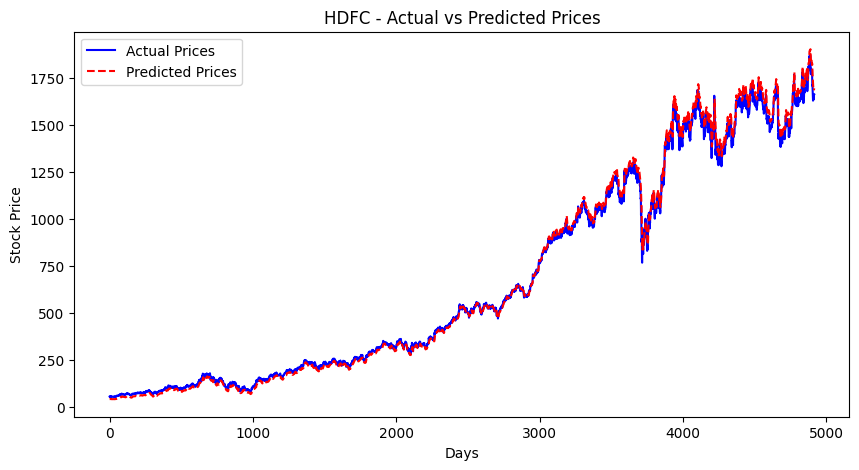

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
✅ SBI RMSE: 12.08


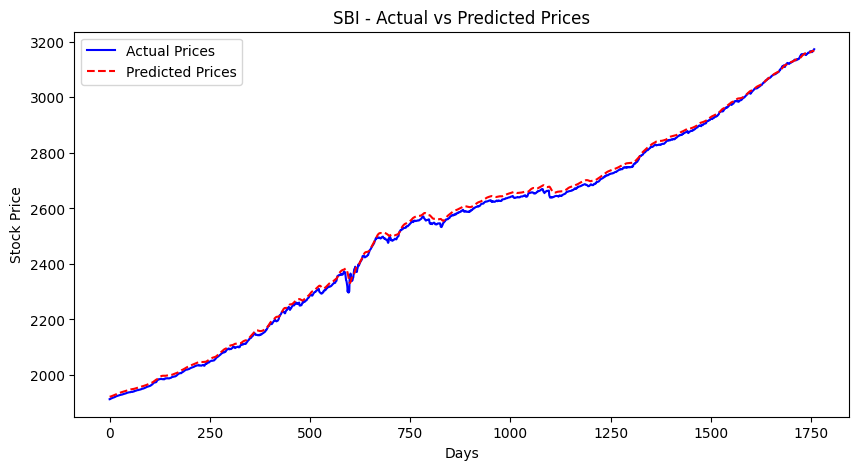

154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step
✅ TATAMOTORS RMSE: 9.53


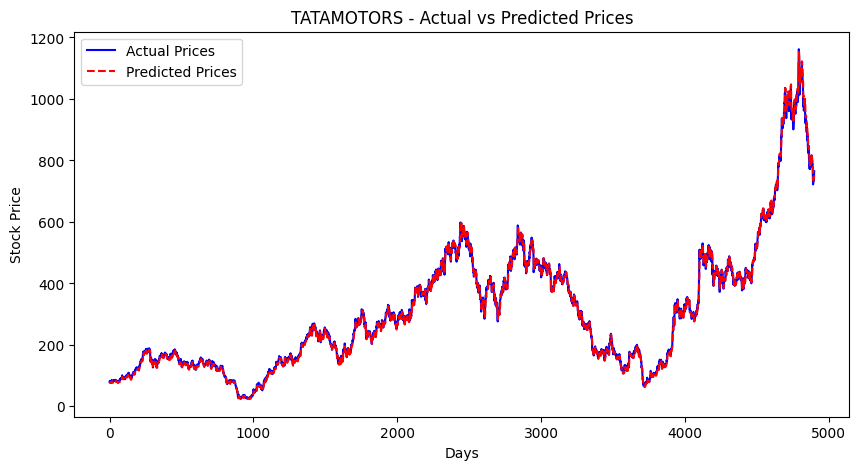

109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
✅ COAL RMSE: 6.57


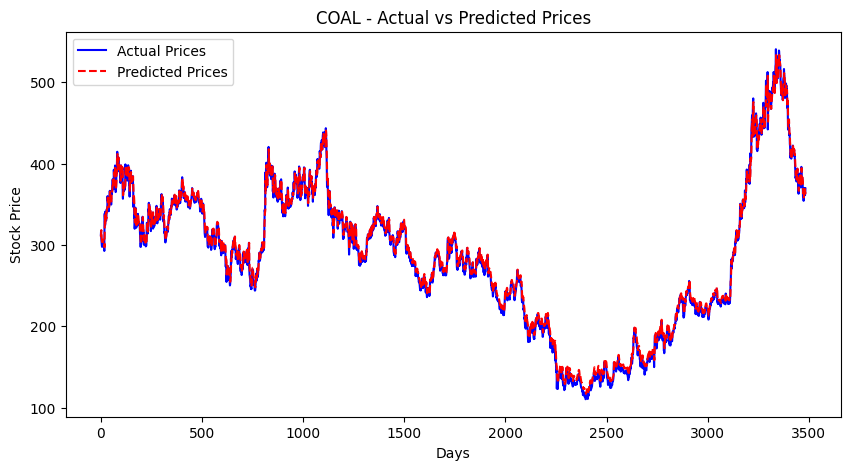

In [8]:
# Function to plot actual vs predicted prices
def plot_predictions(actual, predicted, stock):
    plt.figure(figsize=(10, 5))
    plt.plot(actual, label="Actual Prices", color='blue')
    plt.plot(predicted, label="Predicted Prices", color='red', linestyle='dashed')
    plt.xlabel("Days")
    plt.ylabel("Stock Price")
    plt.title(f"{stock} - Actual vs Predicted Prices")
    plt.legend()
    plt.show()

# Evaluate Model
for stock, model in models.items():
    df = stock_data[stock]
    scaled_close = df['Close_Scaled'].values

    # Ensure there's enough data to create sequences
    if len(scaled_close) < 60:
        print(f"⚠️ {stock} - Not enough data for evaluation!")
        continue

    # Create sequences for evaluation
    X_test, y_test = create_sequences(scaled_close, 60)

    if X_test.shape[0] == 0:
        print(f"⚠️ {stock} - X_test is empty. Skipping evaluation!")
        continue

    # Reshape X_test to match LSTM input shape
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Predict using trained model
    y_pred_scaled = model.predict(X_test)

    # Ensure y_pred_scaled has correct shape for inverse transform
    y_pred_actual = scalers[stock].inverse_transform(y_pred_scaled.reshape(-1, 1))
    y_test_actual = scalers[stock].inverse_transform(y_test.reshape(-1, 1))

    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
    print(f"✅ {stock} RMSE: {rmse:.2f}")

    # Plot Actual vs Predicted
    plot_predictions(y_test_actual, y_pred_actual, stock)


154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step

📊 HDFC Model Evaluation:
✅ RMSE: 27.86
✅ MAE: 20.39
✅ R² Score: 0.9975


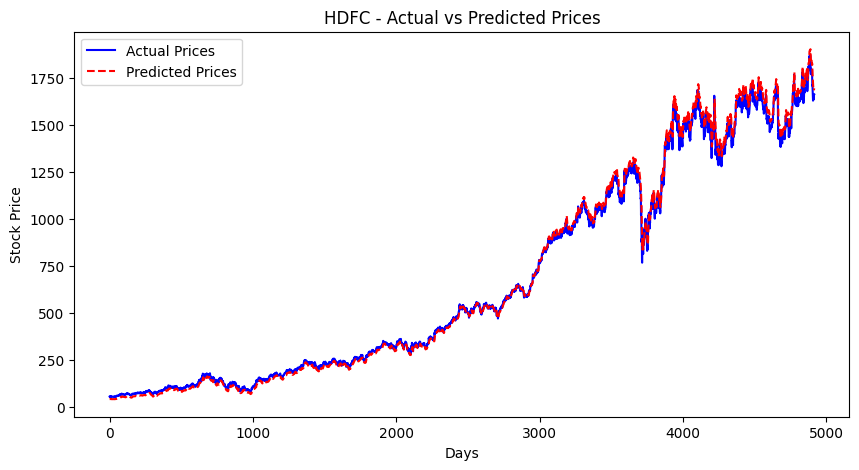

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

📊 SBI Model Evaluation:
✅ RMSE: 12.08
✅ MAE: 10.47
✅ R² Score: 0.9988


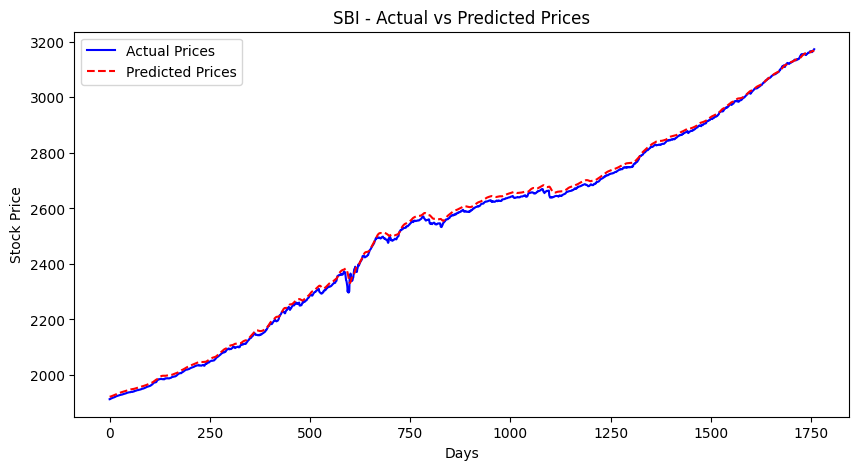

154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step

📊 TATAMOTORS Model Evaluation:
✅ RMSE: 9.53
✅ MAE: 6.56
✅ R² Score: 0.9980


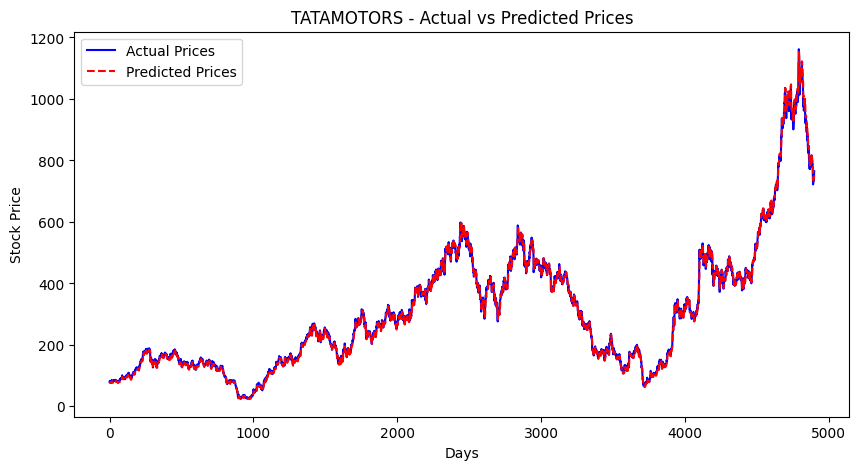

109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step

📊 COAL Model Evaluation:
✅ RMSE: 6.57
✅ MAE: 5.03
✅ R² Score: 0.9946


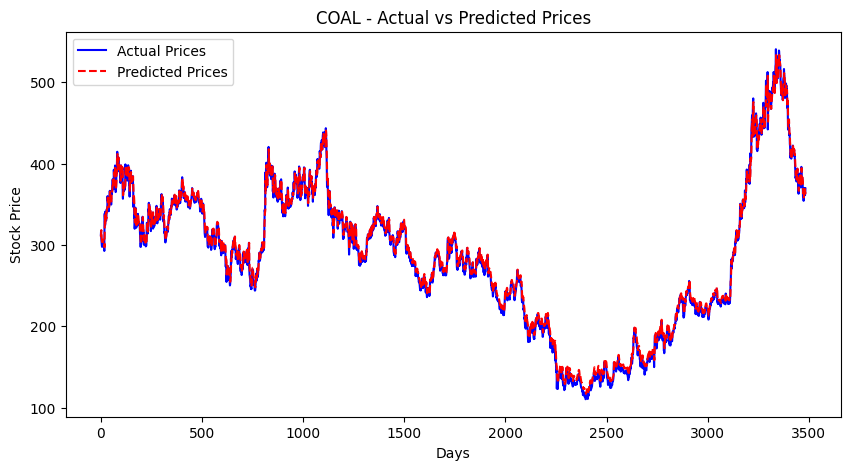


📌 Final Model Accuracy Results:

📈 HDFC Performance:
   RMSE: 27.86
   MAE: 20.39
   R² Score: 0.9975

📈 SBI Performance:
   RMSE: 12.08
   MAE: 10.47
   R² Score: 0.9988

📈 TATAMOTORS Performance:
   RMSE: 9.53
   MAE: 6.56
   R² Score: 0.9980

📈 COAL Performance:
   RMSE: 6.57
   MAE: 5.03
   R² Score: 0.9946


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to compute evaluation metrics
def evaluate_model(actual, predicted, stock):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    print(f"\n📊 {stock} Model Evaluation:")
    print(f"✅ RMSE: {rmse:.2f}")
    print(f"✅ MAE: {mae:.2f}")
    print(f"✅ R² Score: {r2:.4f}")

    return rmse, mae, r2

# Function to plot actual vs predicted prices
def plot_predictions(actual, predicted, stock):
    plt.figure(figsize=(10, 5))
    plt.plot(actual, label="Actual Prices", color='blue')
    plt.plot(predicted, label="Predicted Prices", color='red', linestyle='dashed')
    plt.xlabel("Days")
    plt.ylabel("Stock Price")
    plt.title(f"{stock} - Actual vs Predicted Prices")
    plt.legend()
    plt.show()

# Evaluate Model for Each Stock
accuracy_results = {}

for stock, model in models.items():
    df = stock_data[stock]
    scaled_close = df['Close_Scaled'].values

    # Ensure there's enough data to create sequences
    if len(scaled_close) < 60:
        print(f"⚠️ {stock} - Not enough data for evaluation!")
        continue

    # Create sequences for evaluation
    X_test, y_test = create_sequences(scaled_close, 60)

    if X_test.shape[0] == 0:
        print(f"⚠️ {stock} - X_test is empty. Skipping evaluation!")
        continue

    # Reshape X_test for LSTM input
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Predict using trained model
    y_pred_scaled = model.predict(X_test)

    # Convert predictions back to actual prices
    y_pred_actual = scalers[stock].inverse_transform(y_pred_scaled.reshape(-1, 1))
    y_test_actual = scalers[stock].inverse_transform(y_test.reshape(-1, 1))

    # Compute Accuracy Metrics
    rmse, mae, r2 = evaluate_model(y_test_actual, y_pred_actual, stock)

    # Store Accuracy Results
    accuracy_results[stock] = {"RMSE": rmse, "MAE": mae, "R2 Score": r2}

    # Plot Actual vs Predicted Prices
    plot_predictions(y_test_actual, y_pred_actual, stock)

# Print Final Accuracy Results
print("\n📌 Final Model Accuracy Results:")
for stock, metrics in accuracy_results.items():
    print(f"\n📈 {stock} Performance:")
    print(f"   RMSE: {metrics['RMSE']:.2f}")
    print(f"   MAE: {metrics['MAE']:.2f}")
    print(f"   R² Score: {metrics['R2 Score']:.4f}")


#################MODEL 2     GRU###################

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import yfinance as yf
import os


In [14]:
# Define dataset file paths
dataset_files = {
    "COAL": "COAL.csv",
    "HDFC": "HDFC.csv",
    "SBI": "SBI.csv",
    "TAMO": "TAMO.csv"
}

stock_data = {}

# Load and preprocess each dataset
for stock, file_path in dataset_files.items():
    print(f"Loading dataset: {stock}")

    df = pd.read_csv(file_path)
    print(f"Columns in {stock} dataset:", df.columns)  # Debugging

    # Identify the correct "Close" column
    possible_close_columns = ["Close", "closing price", "Adj Close", "Last Price", "Price", "Close Price"]  
    close_col = next((col for col in df.columns if col.lower() in [c.lower() for c in possible_close_columns]), None)

    if close_col is None:
        print(f"❌ Available columns in {stock} dataset: {df.columns.tolist()}")
        raise ValueError(f"❌ No suitable 'Close' column found in {stock} dataset! Please check the available columns and adjust the 'possible_close_columns' list.")

    df = df[['Date', close_col]].rename(columns={close_col: "Close"})
    
    # ----> Ensure 'Close' column is of type string before applying str methods <----
    df['Close'] = df['Close'].astype(str)
    df['Close'] = df['Close'].str.replace(',', '').astype(float)  

    df.dropna(inplace=True)  # Remove missing values
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)  # Specify dayfirst for date parsing
    df = df.sort_values(by="Date")

    scaler = MinMaxScaler(feature_range=(0, 1))
    df["Close"] = scaler.fit_transform(df[["Close"]])

    stock_data[stock] = {"data": df, "scaler": scaler}

print("✅ Datasets loaded and preprocessed successfully!")

Loading dataset: COAL
Columns in COAL dataset: Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
Loading dataset: HDFC
Columns in HDFC dataset: Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
Loading dataset: SBI
Columns in SBI dataset: Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %'], dtype='object')
Loading dataset: TAMO
Columns in TAMO dataset: Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
✅ Datasets loaded and preprocessed successfully!


In [15]:
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Last 60 days for prediction

X_train, y_train, X_test, y_test = {}, {}, {}, {}

for stock in stock_data:
    stock_prices = stock_data[stock]["data"]["Close"].values.reshape(-1, 1)

    X, y = create_sequences(stock_prices, seq_length)

    split_idx = int(len(X) * 0.8)  # 80% training, 20% testing
    X_train[stock], y_train[stock] = X[:split_idx], y[:split_idx]
    X_test[stock], y_test[stock] = X[split_idx:], y[split_idx:]

print("✅ Data sequences created successfully!")


✅ Data sequences created successfully!


In [16]:
models_gru = {}

for stock in X_train:
    print(f"Training GRU model for {stock}...")

    model = Sequential([
        GRU(units=50, return_sequences=True, input_shape=(seq_length, 1)),
        Dropout(0.2),
        GRU(units=50, return_sequences=False),
        Dropout(0.2),
        Dense(units=25),
        Dense(units=1)
    ])

    model.compile(optimizer="adam", loss="mean_squared_error")

    model.fit(X_train[stock], y_train[stock], epochs=50, batch_size=16, validation_data=(X_test[stock], y_test[stock]))

    models_gru[stock] = model

print("✅ Training complete for all stocks using GRU!")


Training GRU model for COAL...
Epoch 1/50


C:\Users\kesav\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


175/175 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - loss: 0.0147 - val_loss: 4.9712e-04
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0020 - val_loss: 4.5232e-04
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0012 - val_loss: 6.7984e-04
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0010 - val_loss: 3.9368e-04
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 7.8328e-04 - val_loss: 4.0720e-04
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 7.7753e-04 - val_loss: 4.7981e-04
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 5.8349e-04 - val_loss: 3.8192e-04
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 6.1718e-04 - val_loss: 3.2650e-04
Epoch 9/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 6.1032e-04 - val_loss: 3.8514e-04
Epoch 10/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 5.2466e-04 - val_loss: 3.1540e-04
Epoch 11/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 5.5563e-04 - 

Predicting for COAL using GRU...
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step


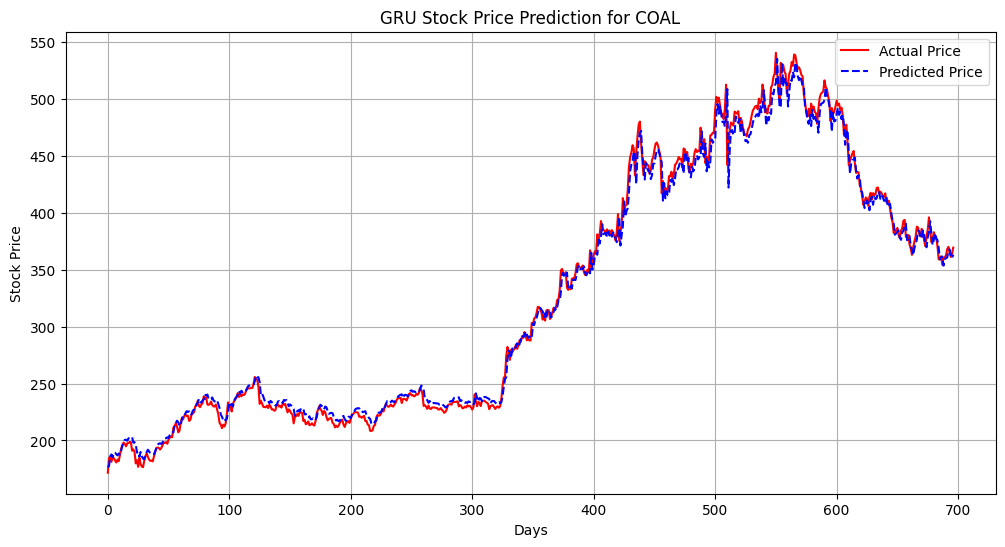

Predicting for HDFC using GRU...
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step  


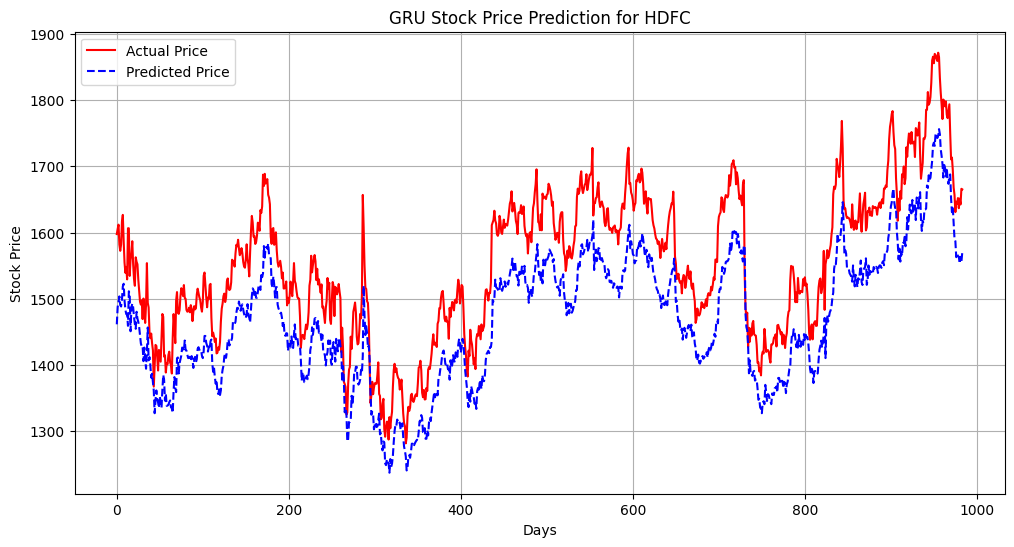

Predicting for SBI using GRU...
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step 


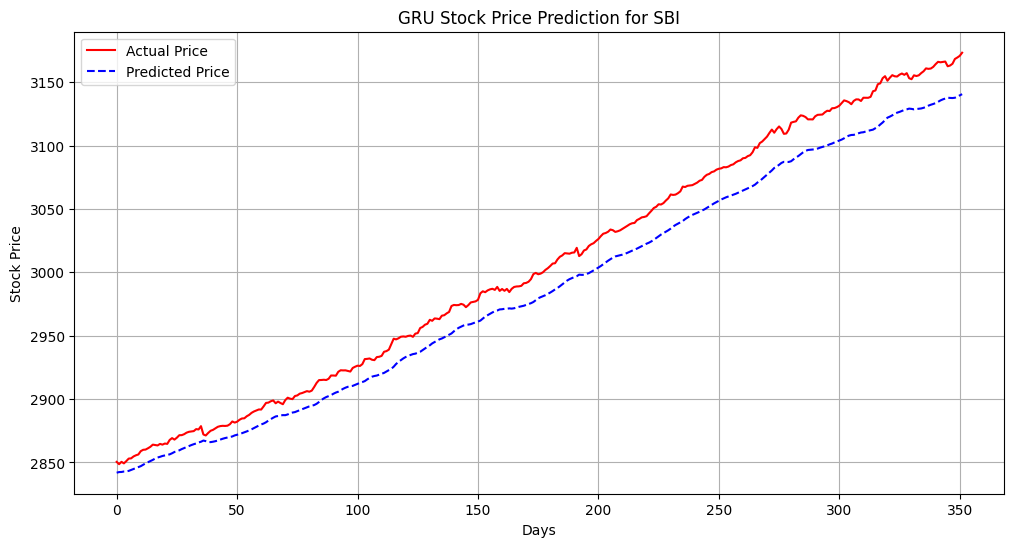

Predicting for TAMO using GRU...
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step  


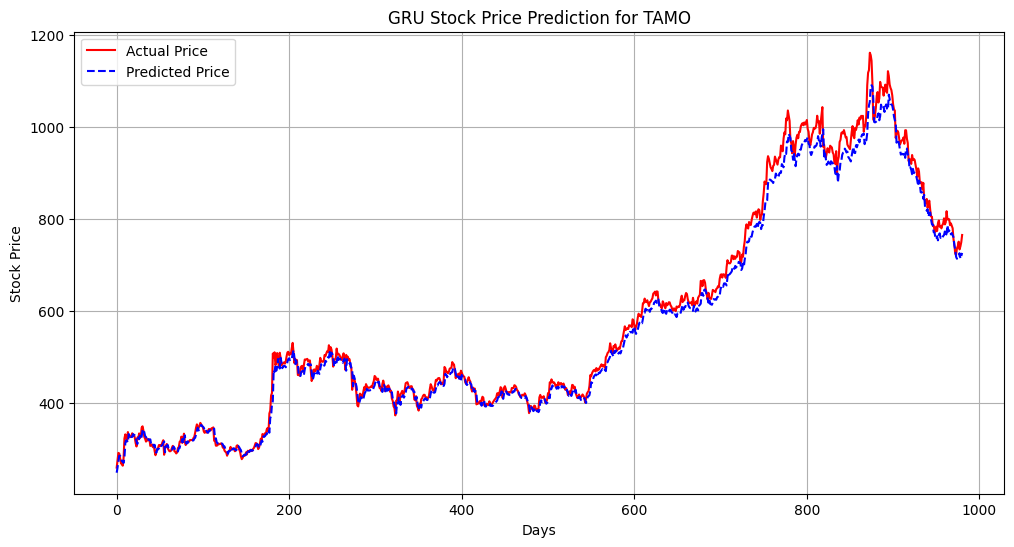

In [17]:
def plot_gru_prediction(stock):
    print(f"Predicting for {stock} using GRU...")

    predicted_prices = models_gru[stock].predict(X_test[stock])
    predicted_prices = stock_data[stock]["scaler"].inverse_transform(predicted_prices.reshape(-1, 1))
    actual_prices = stock_data[stock]["scaler"].inverse_transform(y_test[stock].reshape(-1, 1))

    plt.figure(figsize=(12, 6))
    plt.plot(actual_prices, label="Actual Price", color="red")
    plt.plot(predicted_prices, label="Predicted Price", color="blue", linestyle="dashed")
    plt.xlabel("Days")
    plt.ylabel("Stock Price")
    plt.title(f"GRU Stock Price Prediction for {stock}")
    plt.legend()
    plt.grid()
    plt.show()

for stock in stock_data:
    plot_gru_prediction(stock)


In [18]:
for stock in stock_data:
    predicted_prices = models_gru[stock].predict(X_test[stock])
    predicted_prices = stock_data[stock]["scaler"].inverse_transform(predicted_prices.reshape(-1, 1))
    actual_prices = stock_data[stock]["scaler"].inverse_transform(y_test[stock].reshape(-1, 1))

    rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
    mae = mean_absolute_error(actual_prices, predicted_prices)
    r2 = r2_score(actual_prices, predicted_prices)

    print(f"\n📊 **GRU Model Accuracy for {stock}:**")
    print(f"✅ RMSE: {rmse:.4f}")
    print(f"✅ MAE: {mae:.4f}")
    print(f"✅ R² Score: {r2:.4f}")


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

📊 **GRU Model Accuracy for COAL:**
✅ RMSE: 8.2263
✅ MAE: 5.9384
✅ R² Score: 0.9945
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

📊 **GRU Model Accuracy for HDFC:**
✅ RMSE: 86.7420
✅ MAE: 82.9682
✅ R² Score: 0.4034
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

📊 **GRU Model Accuracy for SBI:**
✅ RMSE: 20.9156
✅ MAE: 19.7546
✅ R² Score: 0.9551
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step

📊 **GRU Model Accuracy for TAMO:**
✅ RMSE: 22.5898
✅ MAE: 16.4212
✅ R² Score: 0.9910



📊 Predicting next 30 days for COAL using GRU with exact dates and Buy/Hold/Sell indications...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66

C:\Users\kesav\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kesav\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129309 (\N{HANDSHAKE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


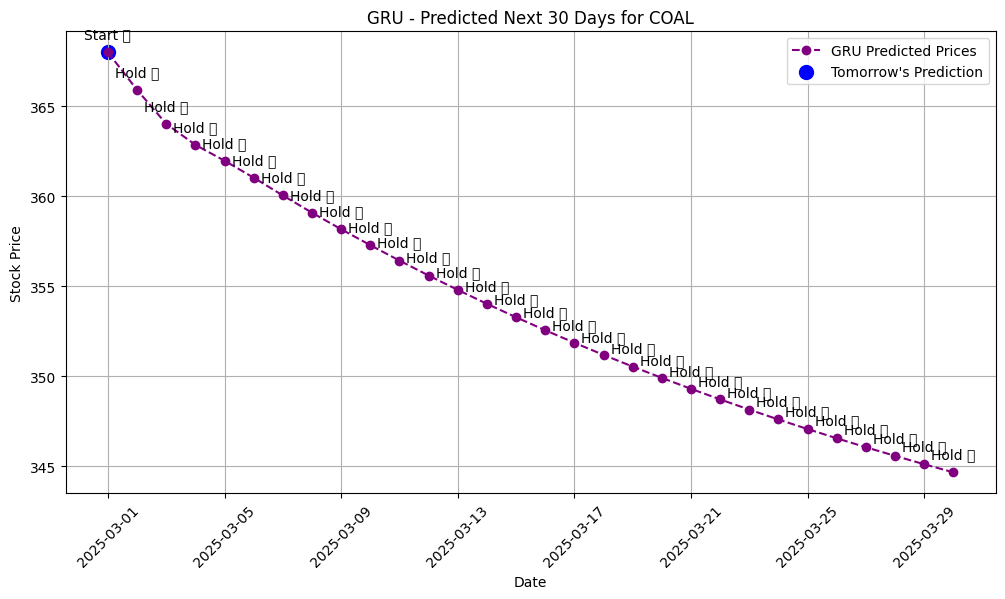


📌 **COAL - Tomorrow's Prediction (2025-03-01):** 368.00 → Hold 🤝

📊 Predicting next 30 days for HDFC using GRU with exact dates and Buy/Hold/Sell indications...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/

C:\Users\kesav\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kesav\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kesav\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129309 (\N{HANDSHAKE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


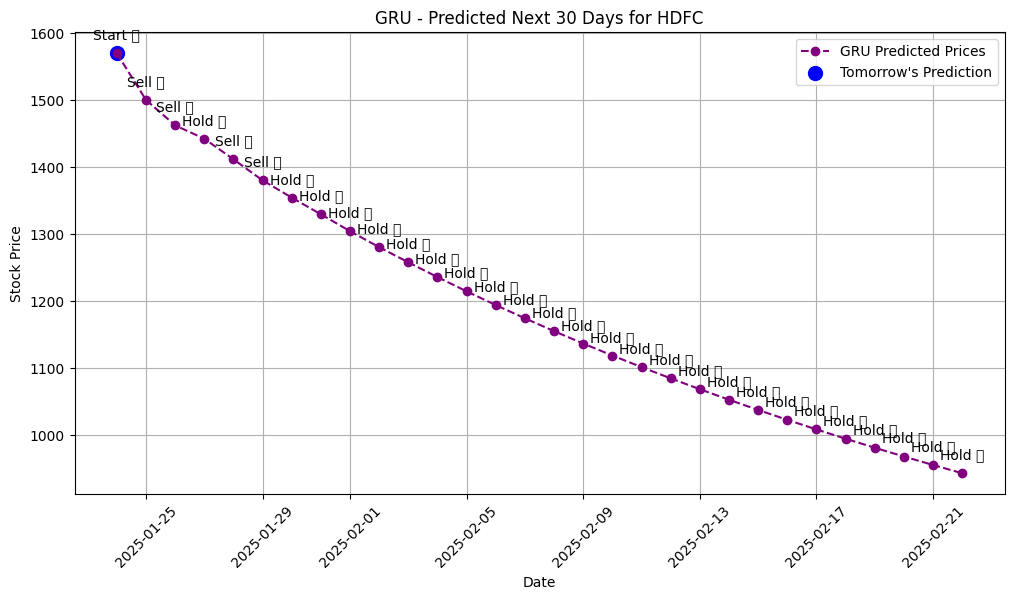


📌 **HDFC - Tomorrow's Prediction (2025-01-24):** 1570.22 → Sell 📉

📊 Predicting next 30 days for SBI using GRU with exact dates and Buy/Hold/Sell indications...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1

C:\Users\kesav\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kesav\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129309 (\N{HANDSHAKE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


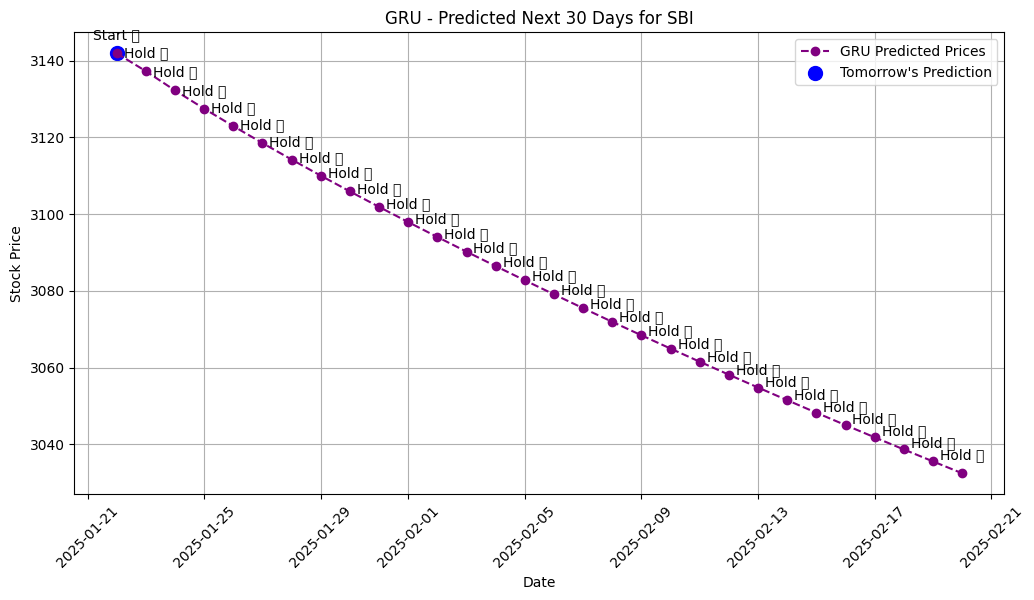


📌 **SBI - Tomorrow's Prediction (2025-01-22):** 3141.89 → Hold 🤝

📊 Predicting next 30 days for TAMO using GRU with exact dates and Buy/Hold/Sell indications...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/

C:\Users\kesav\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kesav\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kesav\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129309 (\N{HANDSHAKE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


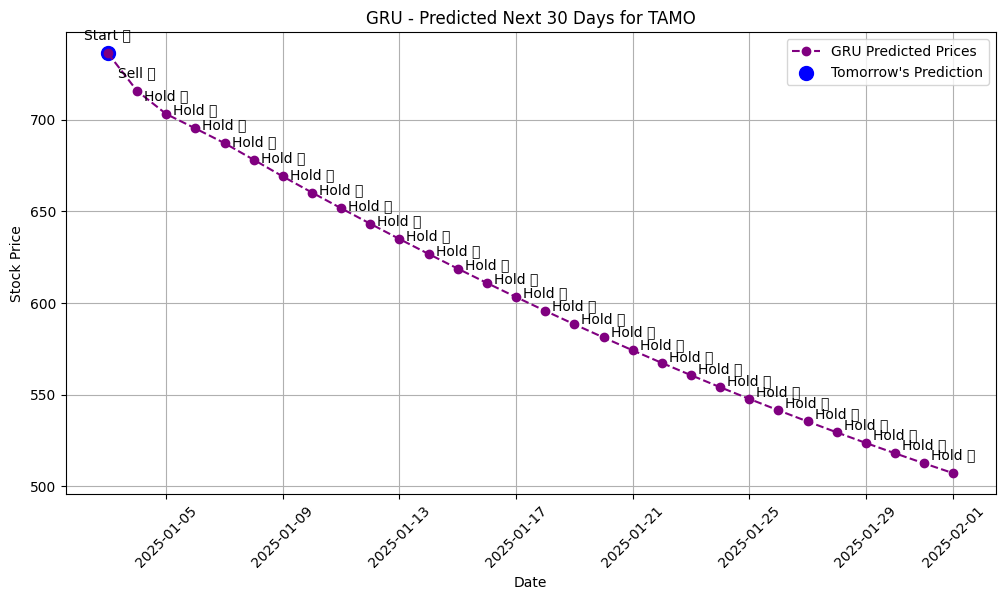


📌 **TAMO - Tomorrow's Prediction (2025-01-03):** 736.35 → Sell 📉


In [19]:
from datetime import datetime, timedelta

def predict_next_30_days_gru_with_dates(stock):
    print(f"\n📊 Predicting next 30 days for {stock} using GRU with exact dates and Buy/Hold/Sell indications...")

    last_60_days = stock_data[stock]["data"]["Close"].values[-60:].reshape(1, 60, 1)
    predicted_prices = []

    # Get the last available date in the dataset
    last_date = stock_data[stock]["data"]["Date"].iloc[-1]

    future_dates = [last_date + timedelta(days=i) for i in range(1, 31)]  # Generate next 30 days

    for _ in range(30):
        predicted_price = models_gru[stock].predict(last_60_days)[0][0]
        predicted_prices.append(predicted_price)
        last_60_days = np.append(last_60_days[:, 1:, :], [[[predicted_price]]], axis=1)

    # Convert predictions back to actual prices
    predicted_prices_actual = stock_data[stock]["scaler"].inverse_transform(np.array(predicted_prices).reshape(-1, 1))

    # Generate Buy/Hold/Sell indications
    indications = []
    for i in range(1, len(predicted_prices_actual)):
        price_change = ((predicted_prices_actual[i] - predicted_prices_actual[i - 1]) / predicted_prices_actual[i - 1]) * 100

        if price_change > 2:
            indications.append("Buy 📈")
        elif price_change < -2:
            indications.append("Sell 📉")
        else:
            indications.append("Hold 🤝")

    # Ensure first day has a neutral indication
    indications.insert(0, "Start 🔵")

    # Plot the results with dates
    plt.figure(figsize=(12, 6))
    plt.plot(future_dates, predicted_prices_actual, marker="o", linestyle="dashed", color="purple", label="GRU Predicted Prices")
    plt.scatter(future_dates[0], predicted_prices_actual[0], color="blue", s=100, label="Tomorrow's Prediction")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.title(f"GRU - Predicted Next 30 Days for {stock}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()

    # Add text labels for Buy/Hold/Sell
    for i, txt in enumerate(indications):
        plt.annotate(txt, (future_dates[i], predicted_prices_actual[i]), textcoords="offset points", xytext=(0, 10), ha='center')

    plt.show()

    # Print Tomorrow’s prediction separately
    print(f"\n📌 **{stock} - Tomorrow's Prediction ({future_dates[0].strftime('%Y-%m-%d')}):** {predicted_prices_actual[0][0]:.2f} → {indications[1]}")

    return future_dates, predicted_prices_actual, indications

# Run next 30-day prediction with exact dates for all stocks
predicted_prices_30d_gru = {}
for stock in stock_data:
    predicted_prices_30d_gru[stock] = predict_next_30_days_gru_with_dates(stock)


In [ ]:
######MODEL 3  BiLSTM #########

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import yfinance as yf
from datetime import datetime, timedelta
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense



In [24]:
dataset_files = {
    "COAL": "COAL.csv",
    "HDFC": "HDFC.csv",
    "SBI": "SBI.csv",
    "TAMO": "TAMO.csv"
}

stock_data = {}

# Load and preprocess each dataset
for stock, file_path in dataset_files.items():
    print(f"Loading dataset: {stock}")

    df = pd.read_csv(file_path)
    print(f"Columns in {stock} dataset:", df.columns)

    possible_close_columns = ["Close", "closing price", "Adj Close", "Last Price", "Price", "Close Price"]  
    close_col = next((col for col in df.columns if col.lower() in [c.lower() for c in possible_close_columns]), None)

    if close_col is None:
        print(f"❌ Available columns in {stock} dataset: {df.columns.tolist()}")
        raise ValueError(f"❌ No suitable 'Close' column found in {stock} dataset!")

    df = df[['Date', close_col]].rename(columns={close_col: "Close"})
    df['Close'] = df['Close'].astype(str).str.replace(',', '').astype(float)
    df.dropna(inplace=True)
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
    df = df.sort_values(by="Date")
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    df["Close"] = scaler.fit_transform(df[["Close"]])
    
    stock_data[stock] = {"data": df, "scaler": scaler}

print("✅ Datasets loaded and preprocessed successfully!")


Loading dataset: COAL
Columns in COAL dataset: Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
Loading dataset: HDFC
Columns in HDFC dataset: Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
Loading dataset: SBI
Columns in SBI dataset: Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %'], dtype='object')
Loading dataset: TAMO
Columns in TAMO dataset: Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
✅ Datasets loaded and preprocessed successfully!


In [25]:

# Create sequences
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60

X_train, y_train, X_test, y_test = {}, {}, {}, {}

for stock in stock_data:
    stock_prices = stock_data[stock]["data"]["Close"].values.reshape(-1, 1)
    X, y = create_sequences(stock_prices, seq_length)
    split_idx = int(len(X) * 0.8)
    X_train[stock], y_train[stock] = X[:split_idx], y[:split_idx]
    X_test[stock], y_test[stock] = X[split_idx:], y[split_idx:]

print("✅ Data sequences created successfully!")


✅ Data sequences created successfully!


In [26]:

# Train BiLSTM models
models_bilstm = {}

for stock in X_train:
    print(f"Training BiLSTM model for {stock}...")

    model = Sequential([
        Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1))),
        Dropout(0.2),
        Bidirectional(LSTM(units=50, return_sequences=False)),
        Dropout(0.2),
        Dense(units=25),
        Dense(units=1)
    ])

    model.compile(optimizer="adam", loss="mean_squared_error")
    model.fit(X_train[stock], y_train[stock], epochs=50, batch_size=16, validation_data=(X_test[stock], y_test[stock]))
    models_bilstm[stock] = model

print("✅ Training complete for all stocks using BiLSTM!")


Training BiLSTM model for COAL...


C:\Users\kesav\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 26s 73ms/step - loss: 0.0130 - val_loss: 0.0015
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - loss: 0.0011 - val_loss: 7.9622e-04
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - loss: 8.7771e-04 - val_loss: 8.1565e-04
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 7.4431e-04 - val_loss: 9.6151e-04
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 6.8234e-04 - val_loss: 5.0646e-04
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 6.2295e-04 - val_loss: 0.0011
Epoch 9/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 6.6931e-04 - val_loss: 4.6699e-04
Epoch 10/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - loss: 5.7860e-04 - val_loss: 4.6451e-04
Epoch 11/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - loss: 5.8224e-

Predicting for COAL using BiLSTM...
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step


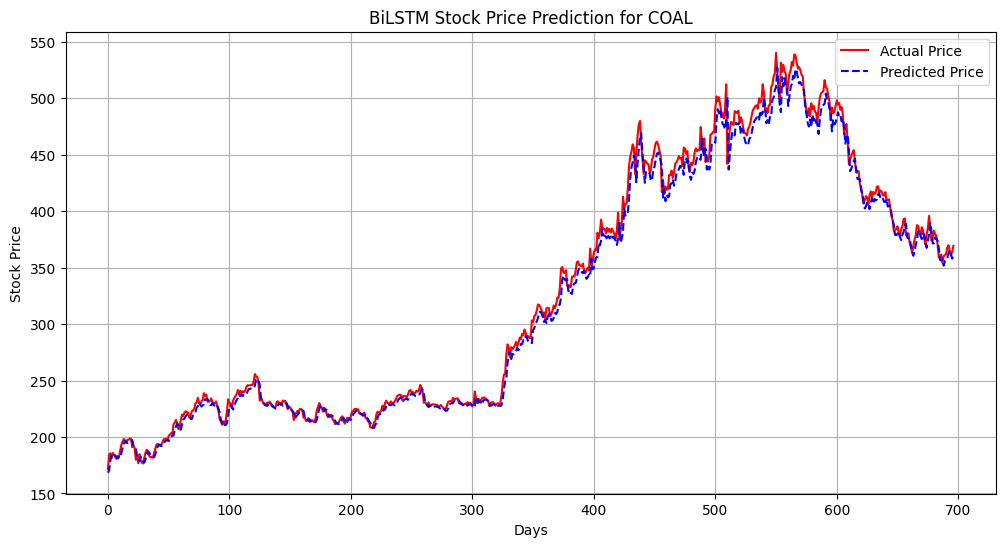

Predicting for HDFC using BiLSTM...
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step


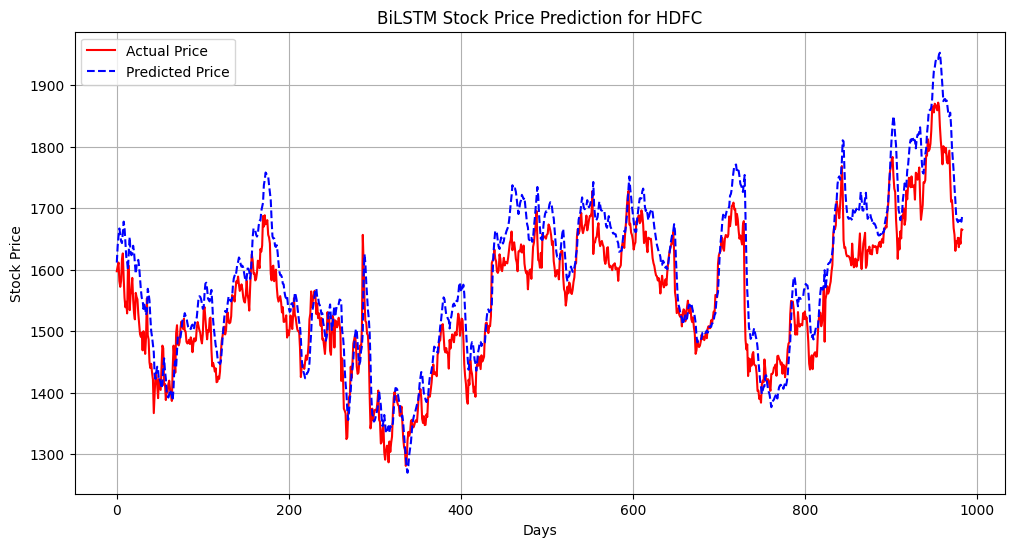

Predicting for SBI using BiLSTM...
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step


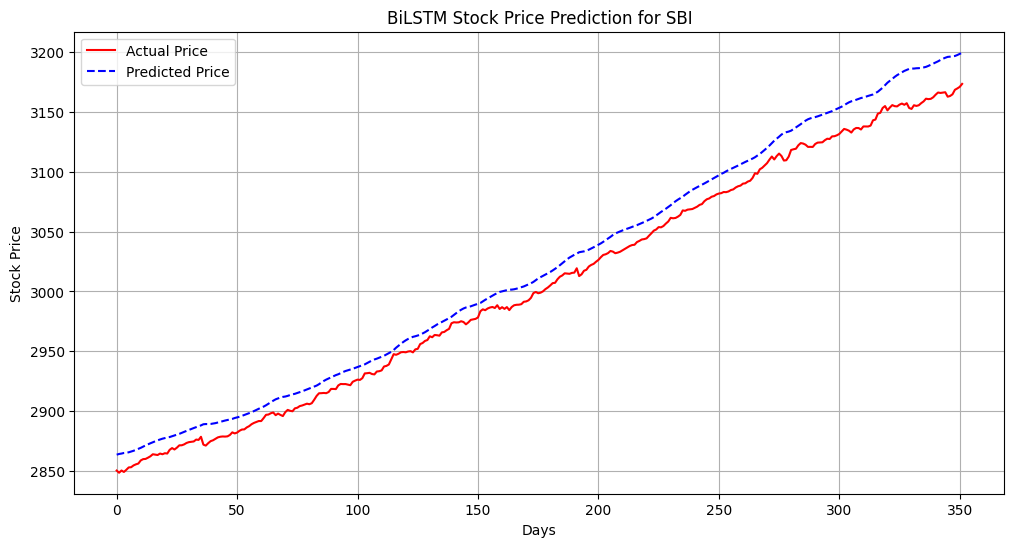

Predicting for TAMO using BiLSTM...
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step


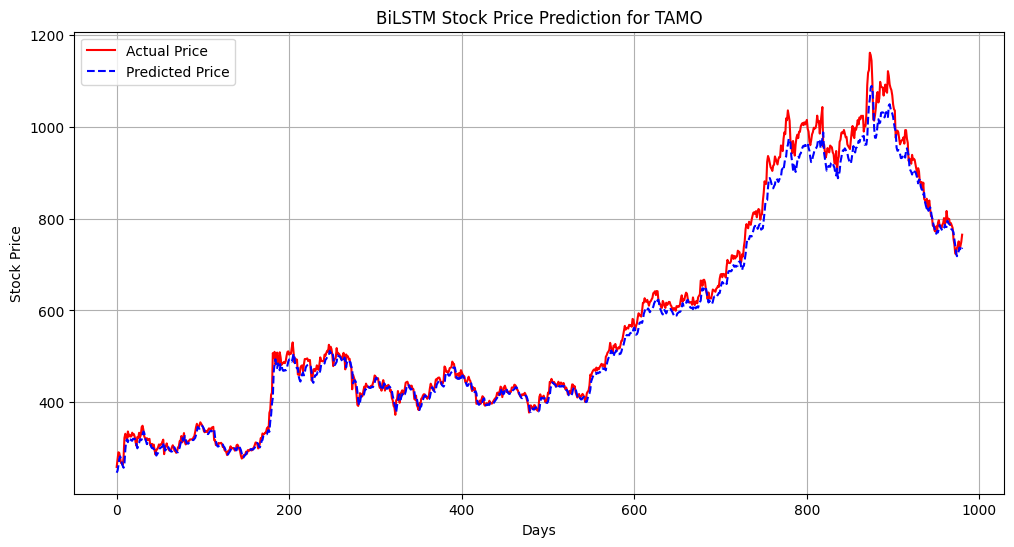

In [27]:

# Prediction and evaluation
def plot_bilstm_prediction(stock):
    print(f"Predicting for {stock} using BiLSTM...")
    predicted_prices = models_bilstm[stock].predict(X_test[stock])
    predicted_prices = stock_data[stock]["scaler"].inverse_transform(predicted_prices.reshape(-1, 1))
    actual_prices = stock_data[stock]["scaler"].inverse_transform(y_test[stock].reshape(-1, 1))

    plt.figure(figsize=(12, 6))
    plt.plot(actual_prices, label="Actual Price", color="red")
    plt.plot(predicted_prices, label="Predicted Price", color="blue", linestyle="dashed")
    plt.xlabel("Days")
    plt.ylabel("Stock Price")
    plt.title(f"BiLSTM Stock Price Prediction for {stock}")
    plt.legend()
    plt.grid()
    plt.show()

for stock in stock_data:
    plot_bilstm_prediction(stock)



In [28]:

# Evaluate model accuracy
for stock in stock_data:
    predicted_prices = models_bilstm[stock].predict(X_test[stock])
    predicted_prices = stock_data[stock]["scaler"].inverse_transform(predicted_prices.reshape(-1, 1))
    actual_prices = stock_data[stock]["scaler"].inverse_transform(y_test[stock].reshape(-1, 1))

    rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
    mae = mean_absolute_error(actual_prices, predicted_prices)
    r2 = r2_score(actual_prices, predicted_prices)

    print(f"\n📊 **BiLSTM Model Accuracy for {stock}:**")
    print(f"✅ RMSE: {rmse:.4f}")
    print(f"✅ MAE: {mae:.4f}")
    print(f"✅ R² Score: {r2:.4f}")

print("✅ Accuracy evaluation completed!")

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step

📊 **BiLSTM Model Accuracy for COAL:**
✅ RMSE: 9.1372
✅ MAE: 6.5359
✅ R² Score: 0.9933
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step

📊 **BiLSTM Model Accuracy for HDFC:**
✅ RMSE: 52.1574
✅ MAE: 42.6243
✅ R² Score: 0.7843
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

📊 **BiLSTM Model Accuracy for SBI:**
✅ RMSE: 15.9430
✅ MAE: 14.8137
✅ R² Score: 0.9739
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step

📊 **BiLSTM Model Accuracy for TAMO:**
✅ RMSE: 24.7623
✅ MAE: 17.5137
✅ R² Score: 0.9892
✅ Accuracy evaluation completed!


In [46]:
############### MODEL 4 LSTM + XG BOOST########
  (PROPOSED)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import yfinance as yf
from datetime import datetime, timedelta


In [4]:
# Define dataset file paths
dataset_files = {
    "COAL": "COAL.csv",
    "HDFC": "HDFC.csv",
    "SBI": "SBI.csv",
    "TAMO": "TAMO.csv"
}

stock_data = {}

# Load and preprocess each dataset
for stock, file_path in dataset_files.items():
    print(f"Loading dataset: {stock}")

    # ----> Force 'Close' column to be read as string <----
    df = pd.read_csv(file_path, dtype={'Price': str})  
    print(df.columns) # Print the actual columns in the dataframe

    # Identify the correct "Close" column
    # Updated possible_close_columns to include 'Price'
    possible_close_columns = ["Close", "closing price", "Adj Close", "Last Price", "Price"]  
    close_col = next((col for col in df.columns if col.lower() in [c.lower() for c in possible_close_columns]), None)

    if close_col is None:
        raise ValueError(f"❌ No suitable 'Close' column found in {stock} dataset! Available columns: {df.columns.tolist()}")

    df = df[['Date', close_col]].rename(columns={close_col: "Close"})
    
    # ----> Remove commas and convert 'Close' to numeric before scaling <----
    df['Close'] = df['Close'].str.replace(',', '').astype(float)  
    
    df.dropna(inplace=True)
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True) # Specify dayfirst for date parsing
    df = df.sort_values(by="Date")

    scaler = MinMaxScaler(feature_range=(0, 1))
    df["Close"] = scaler.fit_transform(df[["Close"]])

    stock_data[stock] = {"data": df, "scaler": scaler}

print("✅ Datasets loaded and preprocessed successfully!")


Loading dataset: COAL
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
Loading dataset: HDFC
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
Loading dataset: SBI
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %'], dtype='object')
Loading dataset: TAMO
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
✅ Datasets loaded and preprocessed successfully!


In [5]:
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Use last 60 days for prediction

X_train, y_train, X_test, y_test = {}, {}, {}, {}

for stock in stock_data:
    stock_prices = stock_data[stock]["data"]["Close"].values.reshape(-1, 1)

    X, y = create_sequences(stock_prices, seq_length)

    split_idx = int(len(X) * 0.8)  # 80% training, 20% testing
    X_train[stock], y_train[stock] = X[:split_idx], y[:split_idx]
    X_test[stock], y_test[stock] = X[split_idx:], y[split_idx:]

print("✅ Data sequences created successfully!")


✅ Data sequences created successfully!


In [6]:
models_lstm = {}

for stock in X_train:
    print(f"Training LSTM model for {stock}...")

    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)),
        Dropout(0.2),
        LSTM(units=50, return_sequences=False),
        Dropout(0.2),
        Dense(units=25),
        Dense(units=1)
    ])

    model.compile(optimizer="adam", loss="mean_squared_error")

    model.fit(X_train[stock], y_train[stock], epochs=50, batch_size=16, validation_data=(X_test[stock], y_test[stock]))

    models_lstm[stock] = model

print("✅ LSTM Training complete for all stocks!")


Training LSTM model for COAL...


C:\Users\kesav\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 19s 70ms/step - loss: 0.0270 - val_loss: 0.0011
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.0018 - val_loss: 8.9487e-04
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - loss: 0.0013 - val_loss: 8.6637e-04
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - loss: 0.0010 - val_loss: 7.0033e-04
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 9.4084e-04 - val_loss: 7.4714e-04
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - loss: 0.0010 - val_loss: 7.7262e-04
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 8.3723e-04 - val_loss: 6.3614e-04
Epoch 9/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - loss: 8.0745e-04 - val_loss: 9.1523e-04
Epoch 10/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - loss: 7.4805e-04 - val_loss: 5.5836e-04
Epoch 11/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 7.5126e-

In [7]:
lstm_predictions_train, lstm_predictions_test = {}, {}

for stock in X_train:
    print(f"Extracting LSTM predictions for {stock}...")

    lstm_train_preds = models_lstm[stock].predict(X_train[stock])
    lstm_test_preds = models_lstm[stock].predict(X_test[stock])

    # Convert LSTM predictions back to actual scale
    lstm_predictions_train[stock] = stock_data[stock]["scaler"].inverse_transform(lstm_train_preds)
    lstm_predictions_test[stock] = stock_data[stock]["scaler"].inverse_transform(lstm_test_preds)


Extracting LSTM predictions for COAL...
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Extracting LSTM predictions for HDFC...
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step 
Extracting LSTM predictions for SBI...
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step  
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step 
Extracting LSTM predictions for TAMO...
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [8]:
models_xgb = {}

for stock in stock_data:
    print(f"Training XGBoost model for {stock}...")

    df_xgb = stock_data[stock]["data"].iloc[seq_length:].copy()
    df_xgb["LSTM_Predictions"] = np.concatenate((lstm_predictions_train[stock], lstm_predictions_test[stock]))

    X_xgb = df_xgb[["LSTM_Predictions"]]
    y_xgb = stock_data[stock]["scaler"].inverse_transform(y_train[stock].reshape(-1, 1)).flatten()

    model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
    model_xgb.fit(X_xgb[:len(y_train[stock])], y_xgb)

    models_xgb[stock] = model_xgb

print("✅ XGBoost Training complete for all stocks!")


Training XGBoost model for COAL...
Training XGBoost model for HDFC...
Training XGBoost model for SBI...
Training XGBoost model for TAMO...
✅ XGBoost Training complete for all stocks!


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Function to calculate accuracy metrics
def evaluate_hybrid_model(stock):
    print(f"\n📊 Evaluating Hybrid Model (LSTM + XGBoost) for {stock}...")

    # Get actual prices for the test set
    actual_prices = stock_data[stock]["scaler"].inverse_transform(y_test[stock].reshape(-1, 1))

    # Get hybrid model predictions (XGBoost refining LSTM outputs)
    lstm_test_preds = models_lstm[stock].predict(X_test[stock])
    hybrid_test_preds = models_xgb[stock].predict(lstm_test_preds)

    # Convert predictions back to actual scale
    hybrid_test_preds_actual = stock_data[stock]["scaler"].inverse_transform(hybrid_test_preds.reshape(-1, 1))

    # Calculate RMSE, MAE, and R² Score
    rmse = np.sqrt(mean_squared_error(actual_prices, hybrid_test_preds_actual))
    mae = mean_absolute_error(actual_prices, hybrid_test_preds_actual)
    r2 = r2_score(actual_prices, hybrid_test_preds_actual)

    print(f"✅ RMSE: {rmse:.4f}")
    print(f"✅ MAE: {mae:.4f}")
    print(f"✅ R² Score: {r2:.4f}")

# Run accuracy evaluation for all stocks
for stock in stock_data:
    evaluate_hybrid_model(stock)



📊 Evaluating Hybrid Model (LSTM + XGBoost) for COAL...
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
✅ RMSE: 48504.2827
✅ MAE: 48504.1551
✅ R² Score: -190033.6940

📊 Evaluating Hybrid Model (LSTM + XGBoost) for HDFC...
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
✅ RMSE: 97194.0757
✅ MAE: 97194.0108
✅ R² Score: -749039.6862

📊 Evaluating Hybrid Model (LSTM + XGBoost) for SBI...
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
✅ RMSE: 2472197.4067
✅ MAE: 2472197.4047
✅ R² Score: -627712807.6499

📊 Evaluating Hybrid Model (LSTM + XGBoost) for TAMO...
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
✅ RMSE: 30215.9041
✅ MAE: 30214.9688
✅ R² Score: -16152.5142


📊 Plotting results for COAL...
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


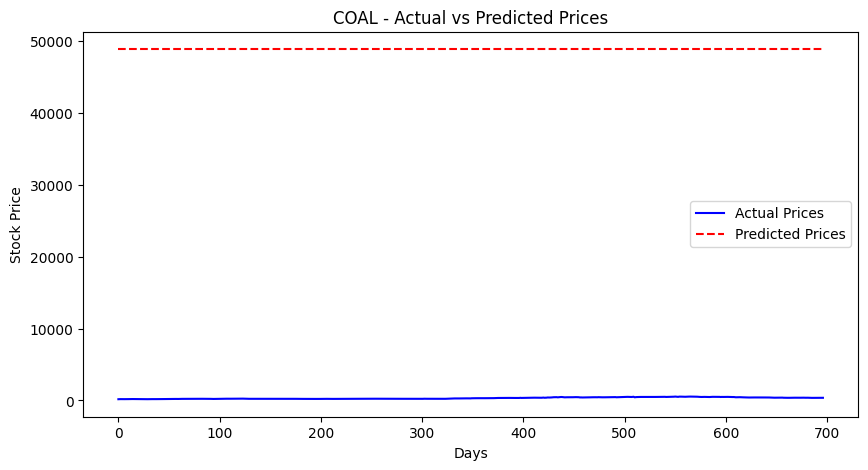

📊 Plotting results for HDFC...
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


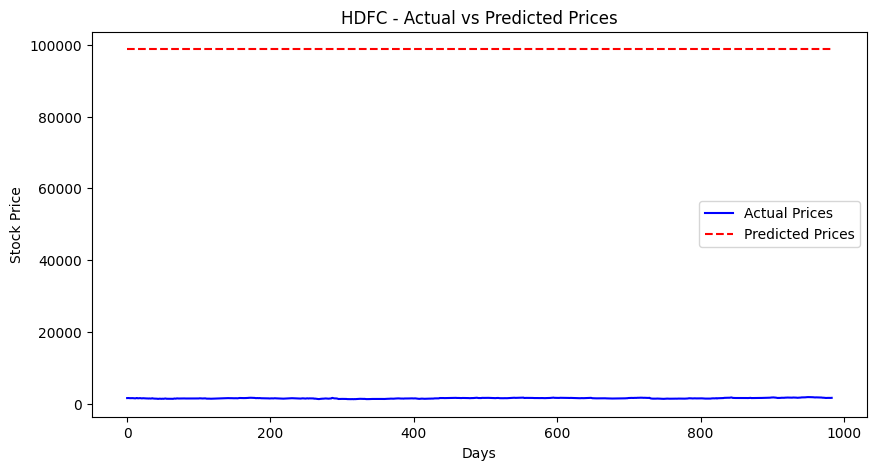

📊 Plotting results for SBI...
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


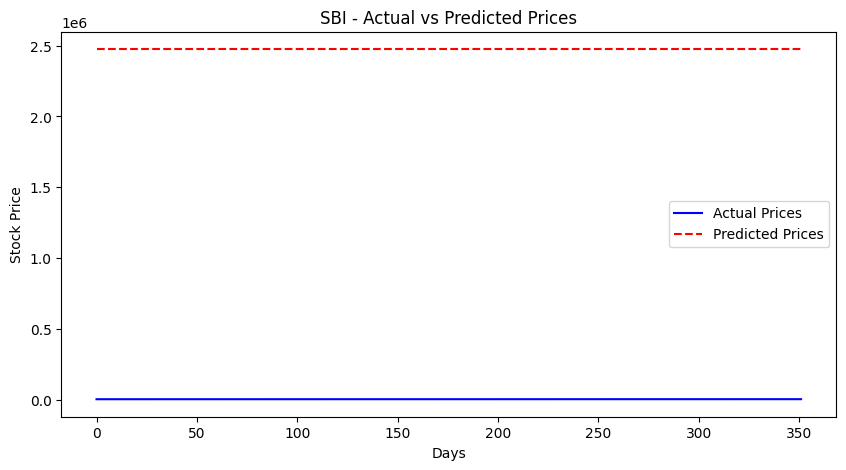

📊 Plotting results for TAMO...
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


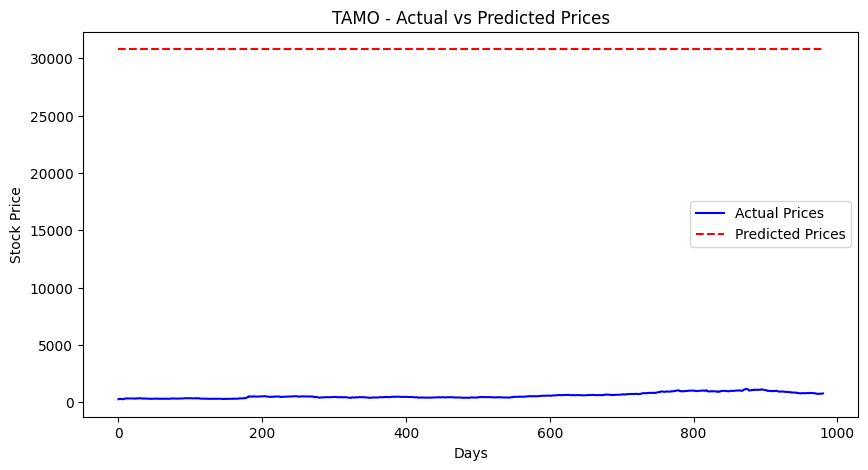

In [10]:
import matplotlib.pyplot as plt

# Function to plot Actual vs. Predicted stock prices
def plot_predictions(actual, predicted, stock):
    plt.figure(figsize=(10, 5))
    plt.plot(actual, label="Actual Prices", color='blue')
    plt.plot(predicted, label="Predicted Prices", color='red', linestyle='dashed')
    plt.xlabel("Days")
    plt.ylabel("Stock Price")
    plt.title(f"{stock} - Actual vs Predicted Prices")
    plt.legend()
    plt.show()

# Loop through each stock and plot actual vs predicted
for stock in stock_data:
    print(f"📊 Plotting results for {stock}...")

    # Get actual prices for test set
    actual_prices = stock_data[stock]["scaler"].inverse_transform(y_test[stock].reshape(-1, 1))

    # Get hybrid model predictions (XGBoost refining LSTM outputs)
    lstm_test_preds = models_lstm[stock].predict(X_test[stock])
    hybrid_test_preds = models_xgb[stock].predict(lstm_test_preds)

    # Convert predictions back to actual scale
    predicted_prices = stock_data[stock]["scaler"].inverse_transform(hybrid_test_preds.reshape(-1, 1))

    # Plot
    plot_predictions(actual_prices, predicted_prices, stock)


In [ ]:
#####comparing --- lstm ,gru & lstm +xgboost####

In [32]:
!pip install ta
!pip install yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import yfinance as yf
from datetime import datetime, timedelta
import ta  # Import the technical analysis library

# Define dataset file paths
dataset_files = {
    "COAL": "COAL.csv",
    "HDFC": "HDFC.csv",
    "SBI": "SBI.csv",
    "TAMO": "TAMO.csv"
}

stock_data = {}

# Load and preprocess each dataset
for stock, file_path in dataset_files.items():
    print(f"Loading dataset: {stock}")

    # Force 'Close' column to be read as string
    df = pd.read_csv(file_path, dtype={'Price': str})
    print(df.columns)  # Print the actual columns in the dataframe

    # Identify the correct "Close" column
    # Updated possible_close_columns to include 'Price'
    possible_close_columns = ["Close", "closing price", "Adj Close", "Last Price", "Price"]
    close_col = next((col for col in df.columns if col.lower() in [c.lower() for c in possible_close_columns]), None)

    if close_col is None:
        raise ValueError(f"❌ No suitable 'Close' column found in {stock} dataset! Available columns: {df.columns.tolist()}")

    df = df[['Date', close_col]].rename(columns={close_col: "Close"})

    # Remove commas and convert 'Close' to numeric before scaling
    df['Close'] = df['Close'].str.replace(',', '').astype(float)

    df.dropna(inplace=True)
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)  # Specify dayfirst for date parsing
    df = df.sort_values(by="Date")

    scaler = MinMaxScaler(feature_range=(0, 1))
    df["Close"] = scaler.fit_transform(df[["Close"]])

    stock_data[stock] = {"data": df, "scaler": scaler}

print("✅ Datasets loaded and preprocessed successfully!")

# Function to create sequences for LSTM
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Use last 60 days for prediction

X_train, y_train, X_test, y_test = {}, {}, {}, {}

for stock in stock_data:
    stock_prices = stock_data[stock]["data"]["Close"].values.reshape(-1, 1)

    X, y = create_sequences(stock_prices, seq_length)

    split_idx = int(len(X) * 0.8)  # 80% training, 20% testing
    X_train[stock], y_train[stock] = X[:split_idx], y[:split_idx]
    X_test[stock], y_test[stock] = X[split_idx:], y[split_idx:]

print("✅ Data sequences created successfully!")

# LSTM Model Training
models_lstm = {}

for stock in X_train:
    print(f"Training LSTM model for {stock}...")

    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)),
        Dropout(0.2),
        LSTM(units=50, return_sequences=False),
        Dropout(0.2),
        Dense(units=25),
        Dense(units=1)
    ])

    model.compile(optimizer="adam", loss="mean_squared_error")

    model.fit(X_train[stock], y_train[stock], epochs=20, batch_size=16, validation_data=(X_test[stock], y_test[stock]))

    models_lstm[stock] = model

print("✅ LSTM Training complete for all stocks!")

# Extract LSTM predictions for XGBoost
lstm_predictions_train, lstm_predictions_test = {}, {}

for stock in X_train:
    print(f"Extracting LSTM predictions for {stock}...")

    lstm_train_preds = models_lstm[stock].predict(X_train[stock])
    lstm_test_preds = models_lstm[stock].predict(X_test[stock])

    # Convert LSTM predictions back to actual scale
    lstm_predictions_train[stock] = stock_data[stock]["scaler"].inverse_transform(lstm_train_preds)
    lstm_predictions_test[stock] = stock_data[stock]["scaler"].inverse_transform(lstm_test_preds)

# XGBoost Model Training with Technical Indicators
models_xgb = {}

for stock in stock_data:
    print(f"Training XGBoost model for {stock}...")

    df_xgb = stock_data[stock]["data"].iloc[seq_length:].copy()
    df_xgb["LSTM_Predictions"] = np.concatenate((lstm_predictions_train[stock], lstm_predictions_test[stock]))
    
    # Calculate and add technical indicators
    df_xgb["MA_10"] = ta.trend.SMAIndicator(df_xgb["Close"], window=10).sma_indicator()
    df_xgb["MA_50"] = ta.trend.SMAIndicator(df_xgb["Close"], window=50).sma_indicator()
    df_xgb["RSI"] = ta.momentum.RSIIndicator(df_xgb["Close"], window=14).rsi()
    df_xgb["MACD"] = ta.trend.MACD(df_xgb["Close"]).macd()

    X_xgb = df_xgb[["LSTM_Predictions", "MA_10", "MA_50", "RSI", "MACD"]]  # Include technical indicators
    y_xgb = stock_data[stock]["scaler"].inverse_transform(y_train[stock].reshape(-1, 1)).flatten()

    model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
    model_xgb.fit(X_xgb[:len(y_train[stock])], y_xgb)

    models_xgb[stock] = model_xgb

print("✅ XGBoost Training complete for all stocks!")

# ... (Rest of your code for GRU, hybrid prediction, and comparison) ...

def compare_models(stock):
    print(f"\n📊 Comparing LSTM, GRU, and Hybrid Model for {stock}...")

    actual_prices = stock_data[stock]["scaler"].inverse_transform(y_test[stock].reshape(-1, 1))

    # LSTM Predictions
    lstm_test_preds = models_lstm[stock].predict(X_test[stock])
    lstm_test_preds_actual = stock_data[stock]["scaler"].inverse_transform(lstm_test_preds.reshape(-1, 1))

    # GRU Predictions (assuming you have a models_gru dictionary)
    gru_test_preds = models_gru[stock].predict(X_test[stock])  
    gru_test_preds_actual = stock_data[stock]["scaler"].inverse_transform(gru_test_preds.reshape(-1, 1))

    # Align XGBoost input features with LSTM predictions
    df_xgb_test = df_xgb.iloc[-len(lstm_test_preds):]

    # Hybrid Model Predictions (LSTM + XGBoost)
    hybrid_features = np.column_stack((
        lstm_test_preds.flatten(),
        df_xgb_test["MA_10"].values,
        df_xgb_test["MA_50"].values,
        df_xgb_test["RSI"].values,
        df_xgb_test["MACD"].values
    ))

    hybrid_test_preds = models_xgb[stock].predict(hybrid_features)
    hybrid_test_preds_actual = stock_data[stock]["scaler"].inverse_transform(hybrid_test_preds.reshape(-1, 1))

    # Calculate RMSE, MAE, and R² Score for each model
    for model_name, preds in zip(
        ["LSTM", "GRU", "Hybrid (LSTM + XGBoost)"],
        [lstm_test_preds_actual, gru_test_preds_actual, hybrid_test_preds_actual]
    ):
        rmse = np.sqrt(mean_squared_error(actual_prices, preds))
        mae = mean_absolute_error(actual_prices, preds)
        r2 = r2_score(actual_prices, preds)

        print(f"\n📊 **{model_name} Accuracy for {stock}:**")
        print(f"✅ RMSE: {rmse:.4f}")
        print(f"✅ MAE: {mae:.4f}")
        print(f"✅ R² Score: {r2:.4f}")

# Run comparison for all stocks
for stock in stock_data:
    compare_models(stock)

Loading dataset: COAL
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
Loading dataset: HDFC
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
Loading dataset: SBI
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %'], dtype='object')
Loading dataset: TAMO
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
✅ Datasets loaded and preprocessed successfully!
✅ Data sequences created successfully!
Training LSTM model for COAL...


C:\Users\kesav\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - loss: 0.0169 - val_loss: 9.1293e-04
Epoch 2/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - loss: 0.0023 - val_loss: 9.1938e-04
Epoch 3/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - loss: 0.0014 - val_loss: 7.6368e-04
Epoch 4/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - loss: 0.0013 - val_loss: 9.4129e-04
Epoch 5/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - loss: 0.0010 - val_loss: 8.3923e-04
Epoch 6/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - loss: 0.0010 - val_loss: 7.2209e-04
Epoch 7/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - loss: 9.2116e-04 - val_loss: 0.0012
Epoch 8/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - loss: 8.6746e-04 - val_loss: 7.1760e-04
Epoch 9/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - loss: 8.2270e-04 - val_loss: 5.5045e-04
Epoch 10/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - loss: 6.9521e-04 - val_loss: 5.1211e-04
Epoch 11/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - loss: 6.67


📊 Comparing LSTM, GRU, and Hybrid Model for COAL...
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step  
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step 

📊 **LSTM Accuracy for COAL:**
✅ RMSE: 9.4820
✅ MAE: 6.7400
✅ R² Score: 0.9927


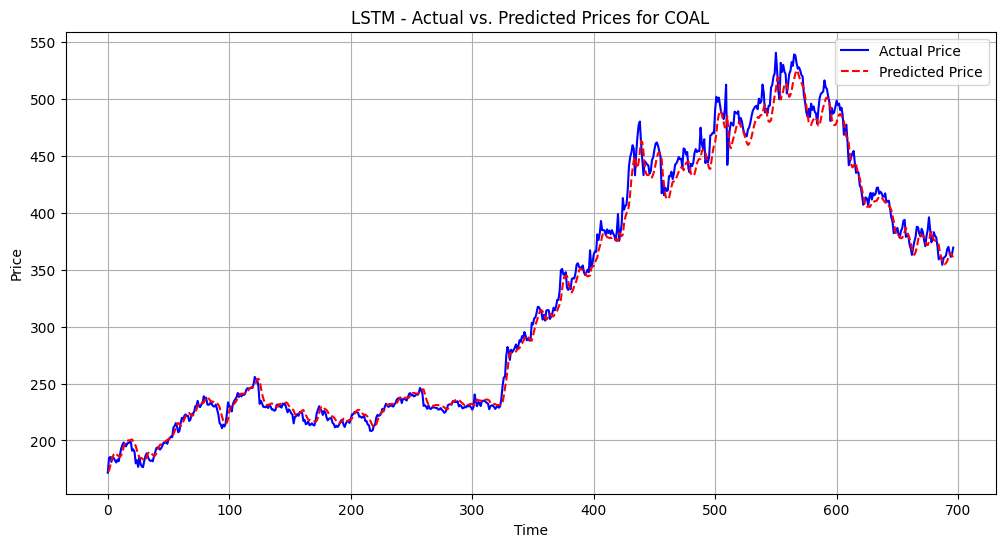


📊 **GRU Accuracy for COAL:**
✅ RMSE: 8.2263
✅ MAE: 5.9384
✅ R² Score: 0.9945


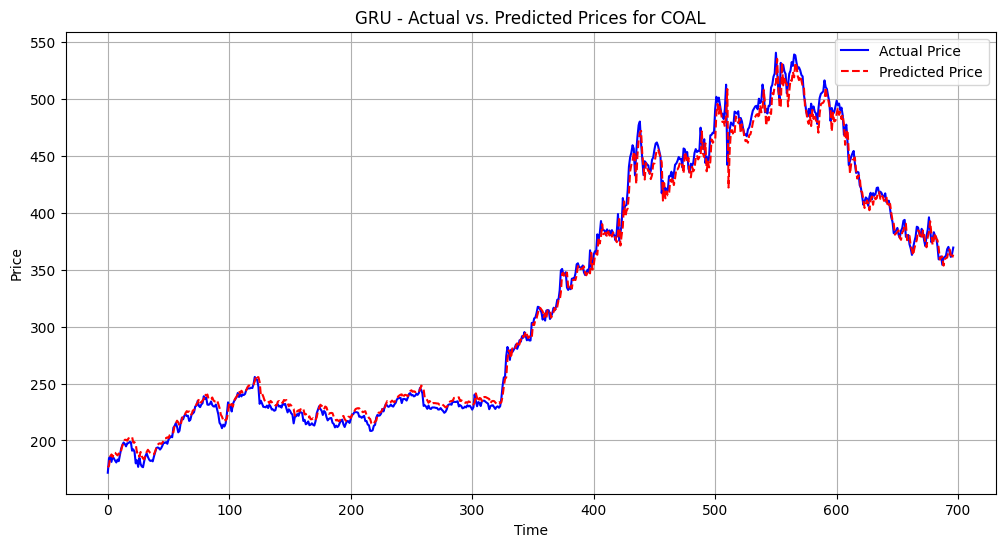


📊 **Hybrid Accuracy for COAL:**
✅ RMSE: 72149.7705
✅ MAE: 71865.7874
✅ R² Score: -420476.3735


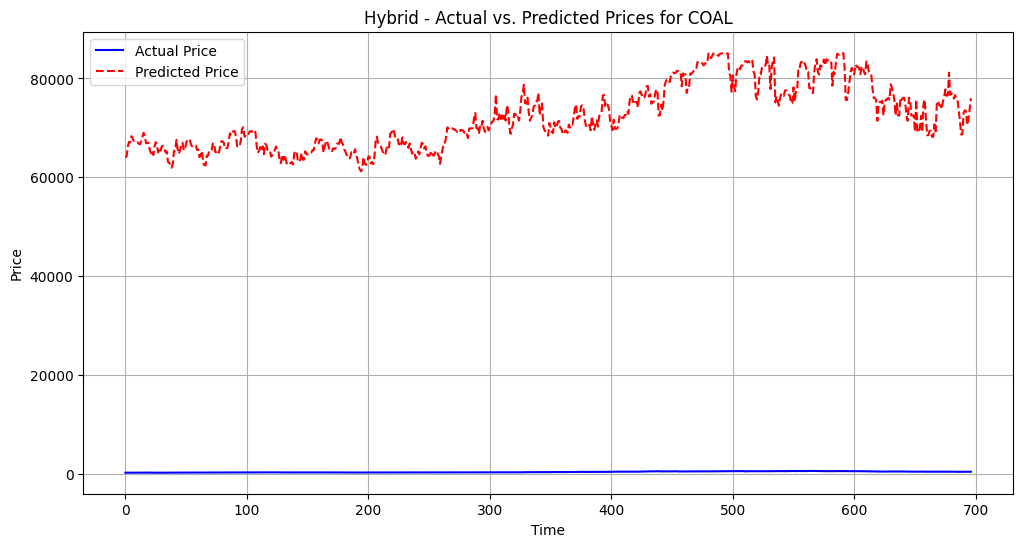


📊 Comparing LSTM, GRU, and Hybrid Model for HDFC...
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step 

📊 **LSTM Accuracy for HDFC:**
✅ RMSE: 52.1296
✅ MAE: 43.7347
✅ R² Score: 0.7845


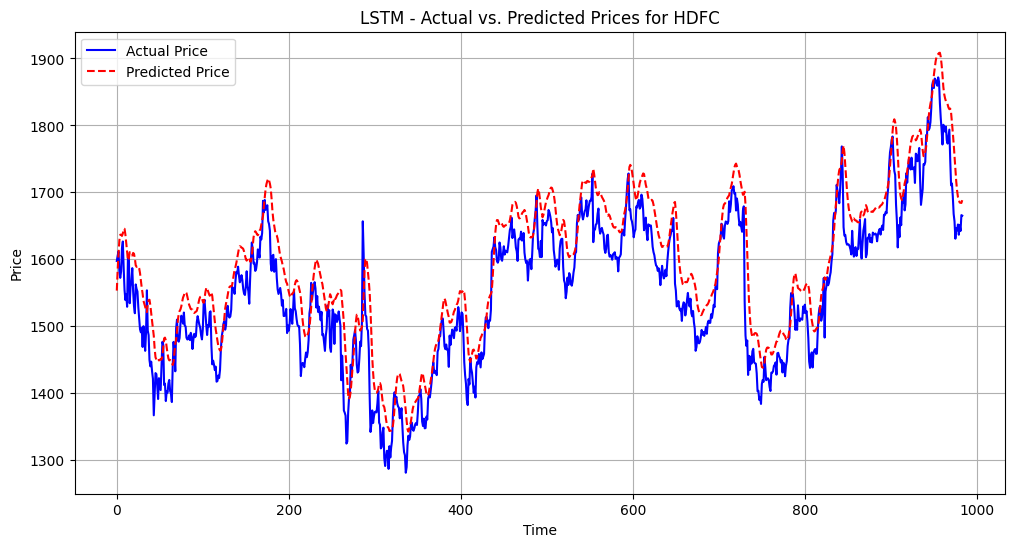


📊 **GRU Accuracy for HDFC:**
✅ RMSE: 86.7420
✅ MAE: 82.9682
✅ R² Score: 0.4034


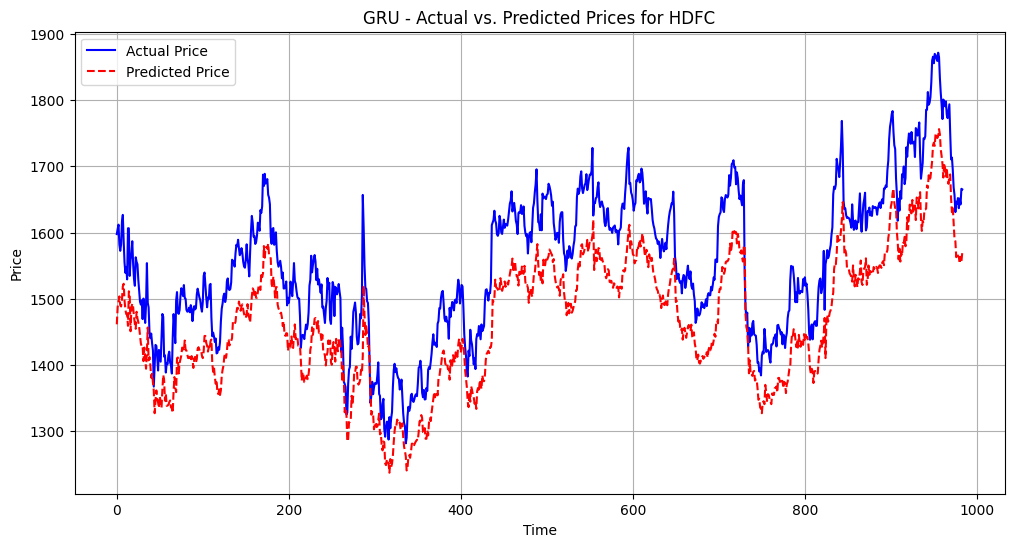


📊 **Hybrid Accuracy for HDFC:**
✅ RMSE: 1197552.5714
✅ MAE: 1151926.9461
✅ R² Score: -113714276.2099


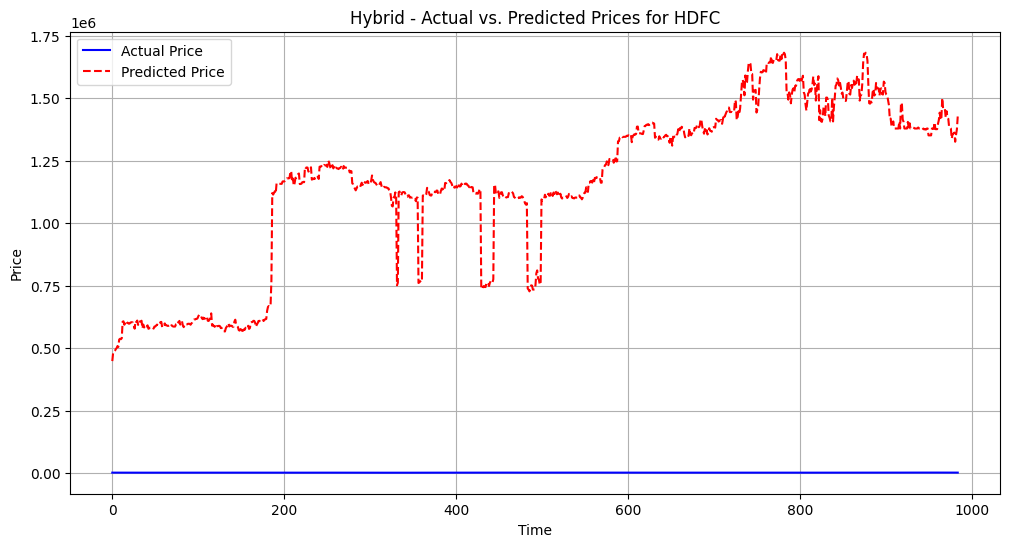


📊 Comparing LSTM, GRU, and Hybrid Model for SBI...
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

📊 **LSTM Accuracy for SBI:**
✅ RMSE: 22.6380
✅ MAE: 21.7391
✅ R² Score: 0.9474


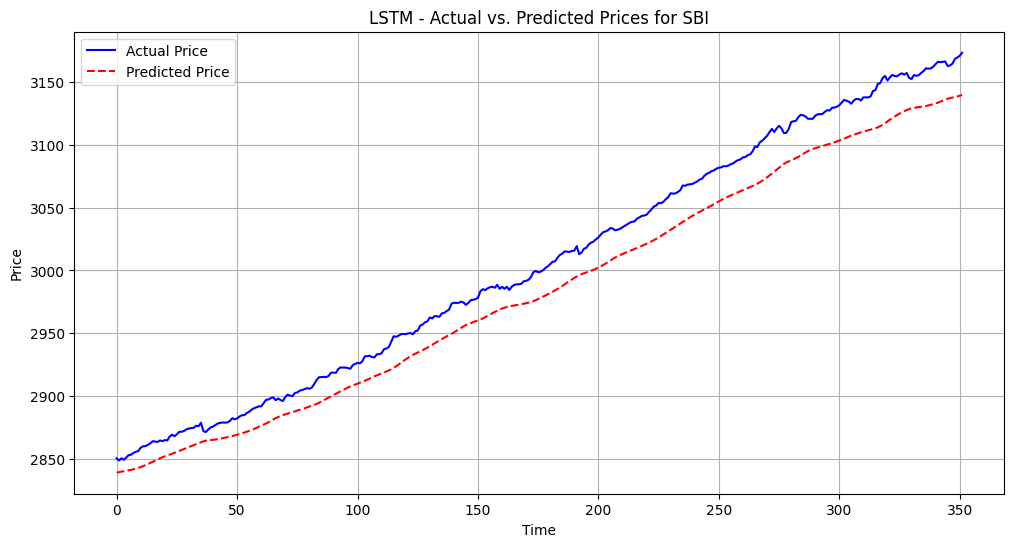


📊 **GRU Accuracy for SBI:**
✅ RMSE: 20.9156
✅ MAE: 19.7546
✅ R² Score: 0.9551


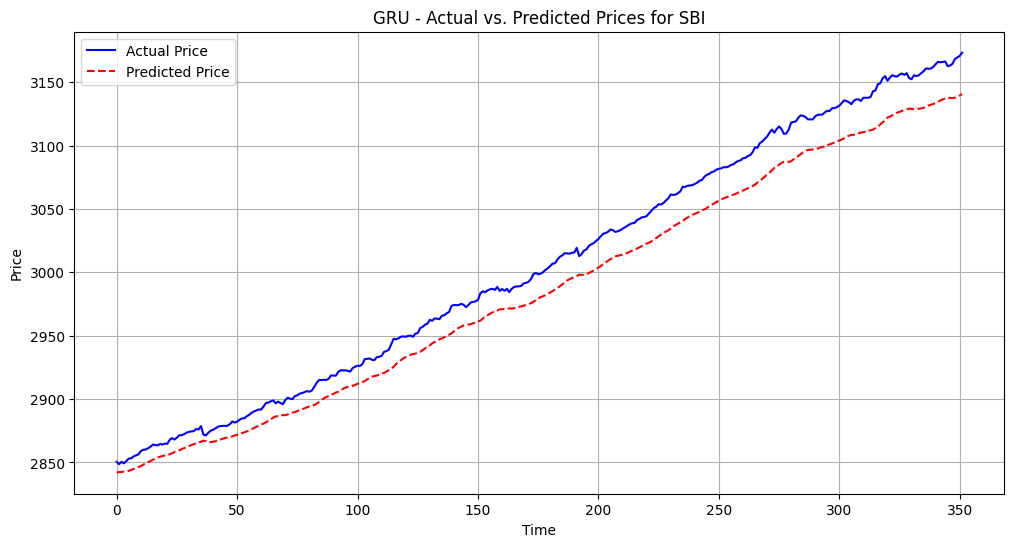


📊 **Hybrid Accuracy for SBI:**
✅ RMSE: 3378492.2476
✅ MAE: 3377932.5915
✅ R² Score: -1172304820.1042


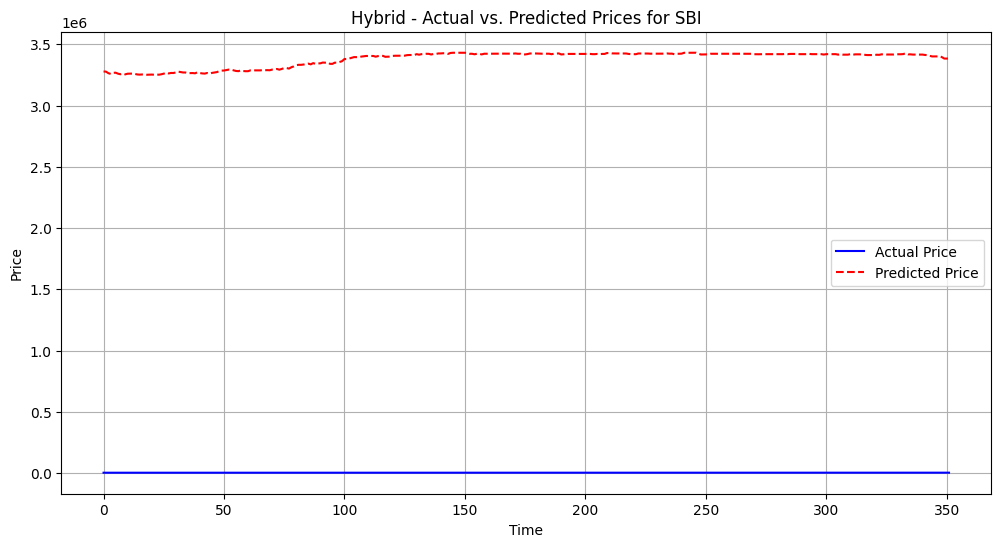


📊 Comparing LSTM, GRU, and Hybrid Model for TAMO...
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step 

📊 **LSTM Accuracy for TAMO:**
✅ RMSE: 16.4172
✅ MAE: 11.2677
✅ R² Score: 0.9952


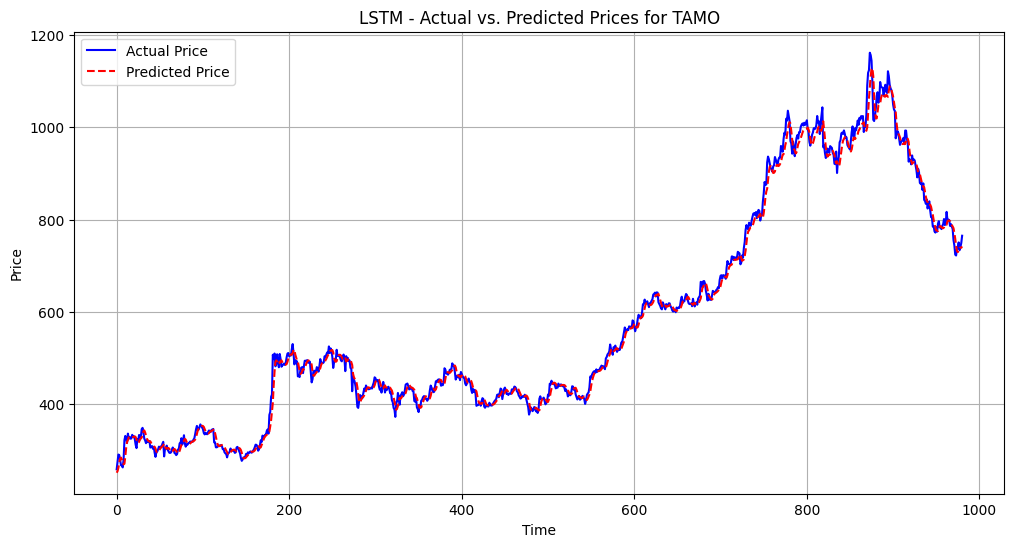


📊 **GRU Accuracy for TAMO:**
✅ RMSE: 22.5898
✅ MAE: 16.4212
✅ R² Score: 0.9910


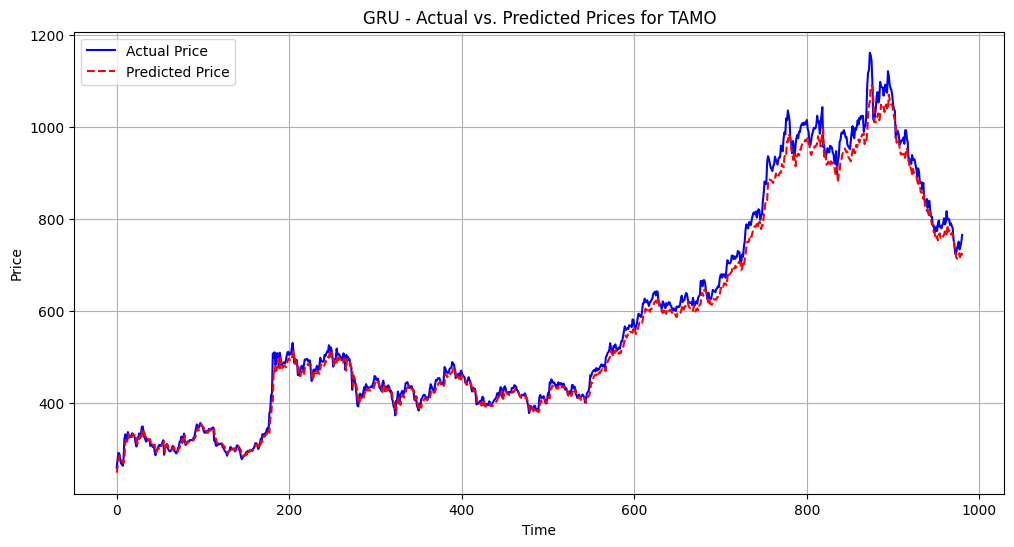


📊 **Hybrid Accuracy for TAMO:**
✅ RMSE: 154809.0327
✅ MAE: 152707.2134
✅ R² Score: -424021.0339


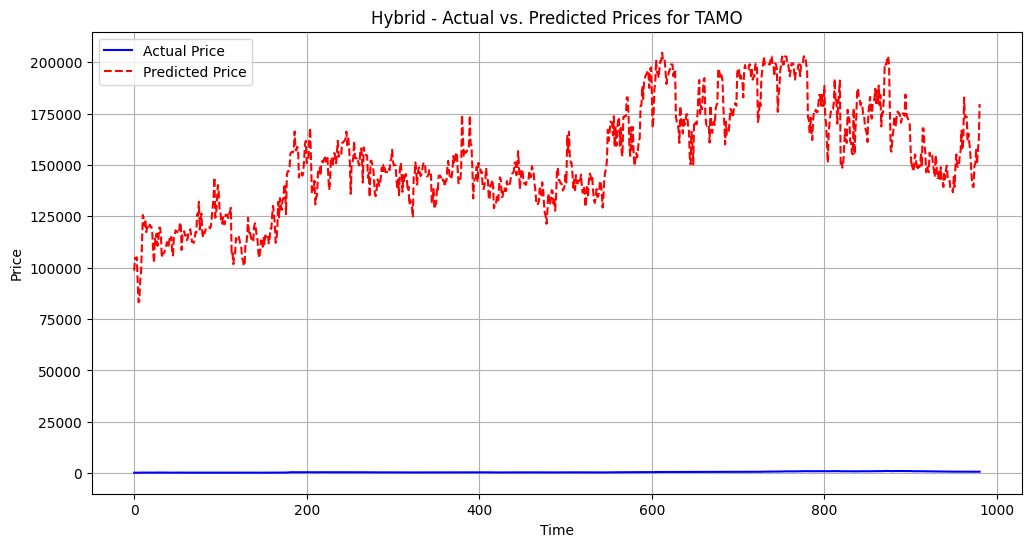

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Dictionary to store accuracy metrics
model_accuracies = {"LSTM": {}, "GRU": {}, "Hybrid": {}}

def compare_models_and_plot(stock):
    print(f"\n📊 Comparing LSTM, GRU, and Hybrid Model for {stock}...")

    actual_prices = stock_data[stock]["scaler"].inverse_transform(y_test[stock].reshape(-1, 1))

    # LSTM Predictions
    lstm_test_preds = models_lstm[stock].predict(X_test[stock])
    lstm_test_preds_actual = stock_data[stock]["scaler"].inverse_transform(lstm_test_preds.reshape(-1, 1))

    # GRU Predictions
    gru_test_preds = models_gru[stock].predict(X_test[stock])
    gru_test_preds_actual = stock_data[stock]["scaler"].inverse_transform(gru_test_preds.reshape(-1, 1))

    # Align XGBoost input features with LSTM predictions
    df_xgb_test = df_xgb.iloc[-len(lstm_test_preds):]

    # Hybrid Model Predictions (LSTM + XGBoost)
    hybrid_features = np.column_stack((
        lstm_test_preds.flatten(),
        df_xgb_test["MA_10"].values,
        df_xgb_test["MA_50"].values,
        df_xgb_test["RSI"].values,
        df_xgb_test["MACD"].values
    ))

    hybrid_test_preds = models_xgb[stock].predict(hybrid_features)
    hybrid_test_preds_actual = stock_data[stock]["scaler"].inverse_transform(hybrid_test_preds.reshape(-1, 1))

    # Calculate RMSE, MAE, and R² Score for each model
    for model_name, preds in zip(
        ["LSTM", "GRU", "Hybrid"],
        [lstm_test_preds_actual, gru_test_preds_actual, hybrid_test_preds_actual]
    ):
        rmse = np.sqrt(mean_squared_error(actual_prices, preds))
        mae = mean_absolute_error(actual_prices, preds)
        r2 = r2_score(actual_prices, preds)

        model_accuracies[model_name][stock] = {"RMSE": rmse, "MAE": mae, "R2": r2}

        print(f"\n📊 **{model_name} Accuracy for {stock}:**")
        print(f"✅ RMSE: {rmse:.4f}")
        print(f"✅ MAE: {mae:.4f}")
        print(f"✅ R² Score: {r2:.4f}")

        # Plot actual vs predicted prices for the current model within the loop
        plt.figure(figsize=(12, 6))
        plt.plot(actual_prices, label="Actual Price", color="blue")
        plt.plot(preds, label="Predicted Price", color="red", linestyle="--")
        plt.title(f"{model_name} - Actual vs. Predicted Prices for {stock}")
        plt.xlabel("Time")
        plt.ylabel("Price")
        plt.legend()
        plt.grid(True)
        plt.show()

# Run comparison for all stocks
for stock in stock_data:
    compare_models_and_plot(stock)

# Removed the problematic code block that was causing the error.
# The 'preds', 'actual_prices', 'model_name', and 'stock' variables 
# were not defined in this scope after the loop in 'compare_models_and_plot' finished.


📊 Comparing LSTM, GRU, and Hybrid Model for COAL...
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step

📊 **LSTM Accuracy for COAL:**
✅ RMSE: 9.4820
✅ MAE: 6.7400
✅ R² Score: 0.9927

📊 **GRU Accuracy for COAL:**
✅ RMSE: 8.2263
✅ MAE: 5.9384
✅ R² Score: 0.9945

📊 **Hybrid Accuracy for COAL:**
✅ RMSE: 72149.7705
✅ MAE: 71865.7874
✅ R² Score: -420476.3735

📊 Comparing LSTM, GRU, and Hybrid Model for HDFC...
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step

📊 **LSTM Accuracy for HDFC:**
✅ RMSE: 52.1296
✅ MAE: 43.7347
✅ R² Score: 0.7845

📊 **GRU Accuracy for HDFC:**
✅ RMSE: 86.7420
✅ MAE: 82.9682
✅ R² Score: 0.4034

📊 **Hybrid Accuracy for HDFC:**
✅ RMSE: 1197552.5714
✅ MAE: 1151926.9461
✅ R² Score: -113714276.2099

📊 Comparing LSTM, GRU, and Hybrid Model for SBI...
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

📊 **LSTM Accuracy for SBI:**
✅ RMSE: 22.6380
✅ MAE: 21.7391
✅ R² Score: 0.9474

📊 **GR

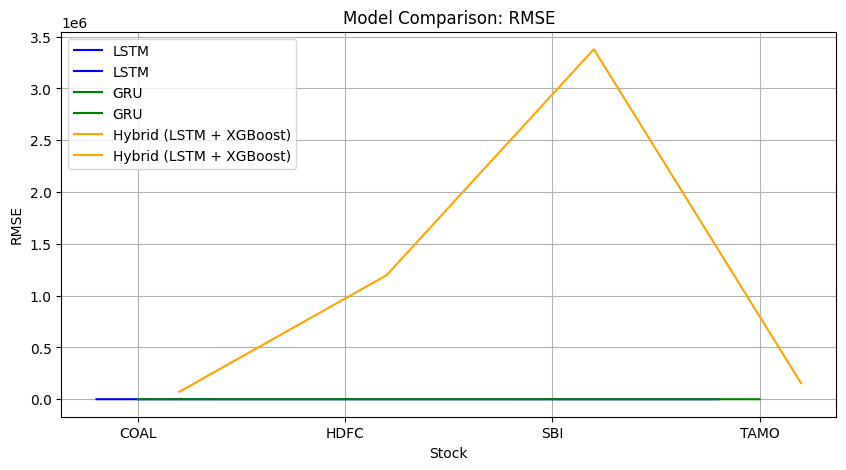

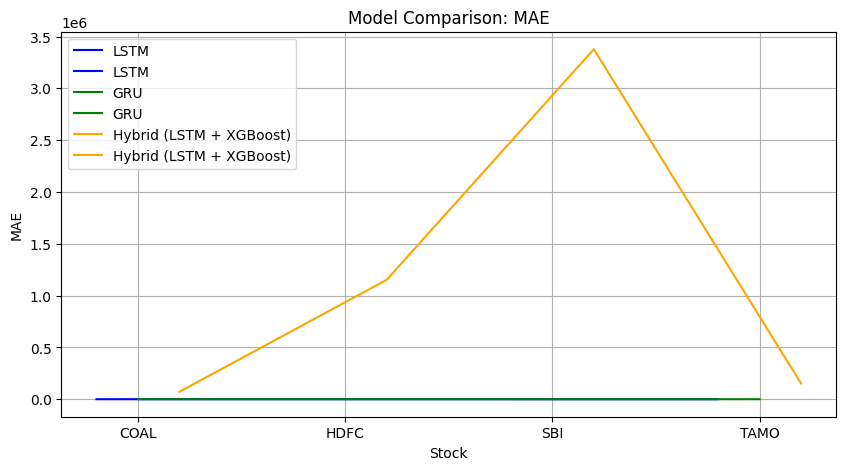

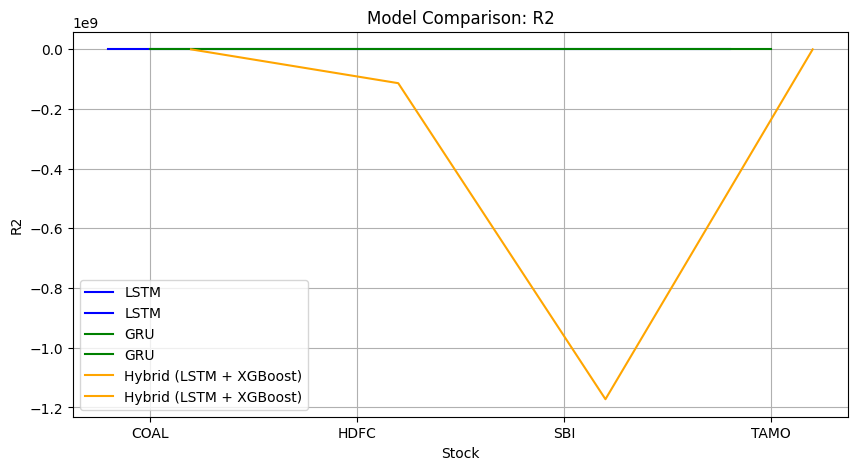

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Dictionary to store accuracy metrics
model_accuracies = {"LSTM": {}, "GRU": {}, "Hybrid": {}}

def compare_models_and_plot(stock):
    print(f"\n📊 Comparing LSTM, GRU, and Hybrid Model for {stock}...")

    actual_prices = stock_data[stock]["scaler"].inverse_transform(y_test[stock].reshape(-1, 1))

    # LSTM Predictions
    lstm_test_preds = models_lstm[stock].predict(X_test[stock])
    lstm_test_preds_actual = stock_data[stock]["scaler"].inverse_transform(lstm_test_preds.reshape(-1, 1))

    # GRU Predictions
    gru_test_preds = models_gru[stock].predict(X_test[stock])
    gru_test_preds_actual = stock_data[stock]["scaler"].inverse_transform(gru_test_preds.reshape(-1, 1))

    # Align XGBoost input features with LSTM predictions
    df_xgb_test = df_xgb.iloc[-len(lstm_test_preds):]

    # Hybrid Model Predictions (LSTM + XGBoost)
    hybrid_features = np.column_stack((
        lstm_test_preds.flatten(),
        df_xgb_test["MA_10"].values,
        df_xgb_test["MA_50"].values,
        df_xgb_test["RSI"].values,
        df_xgb_test["MACD"].values
    ))

    hybrid_test_preds = models_xgb[stock].predict(hybrid_features)
    hybrid_test_preds_actual = stock_data[stock]["scaler"].inverse_transform(hybrid_test_preds.reshape(-1, 1))

    # Calculate RMSE, MAE, and R² Score for each model
    for model_name, preds in zip(
        ["LSTM", "GRU", "Hybrid"],
        [lstm_test_preds_actual, gru_test_preds_actual, hybrid_test_preds_actual]
    ):
        rmse = np.sqrt(mean_squared_error(actual_prices, preds))
        mae = mean_absolute_error(actual_prices, preds)
        r2 = r2_score(actual_prices, preds)

        model_accuracies[model_name][stock] = {"RMSE": rmse, "MAE": mae, "R2": r2}

        print(f"\n📊 **{model_name} Accuracy for {stock}:**")
        print(f"✅ RMSE: {rmse:.4f}")
        print(f"✅ MAE: {mae:.4f}")
        print(f"✅ R² Score: {r2:.4f}")

# Run comparison for all stocks
for stock in stock_data:
    compare_models_and_plot(stock)

# Plot comparison for each accuracy metric
def plot_accuracy_comparison(metric):
    labels = list(stock_data.keys())  # Stock names
    lstm_values = [model_accuracies["LSTM"][stock][metric] for stock in labels]
    gru_values = [model_accuracies["GRU"][stock][metric] for stock in labels]
    hybrid_values = [model_accuracies["Hybrid"][stock][metric] for stock in labels]

    x = np.arange(len(labels))  # Label locations
    width = 0.2  # Bar width

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(x - width, lstm_values, width, label="LSTM", color="blue")
    ax.plot(x, gru_values, width, label="GRU", color="green")
    ax.plot(x + width, hybrid_values, width, label="Hybrid (LSTM + XGBoost)", color="orange")

    ax.set_xlabel("Stock")
    ax.set_ylabel(metric)
    ax.set_title(f"Model Comparison: {metric}")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    ax.grid()

    plt.show()

# Plot RMSE, MAE, and R² Score comparison
for metric in ["RMSE", "MAE", "R2"]:
    plot_accuracy_comparison(metric)


In [ ]:
##### MODEL 5   PROPESED BiLSTM + XGBoost #####

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
import xgboost as xgb


In [32]:
# Define dataset paths
dataset_files = {
    "HDFC": "HDFC.csv",
    "SBI": "SBI.csv",
    "TATAMOTORS": "TAMO.csv",
    "COAL": "COAL.csv"
}

stock_data = {}
scalers = {}

# Load and preprocess each stock dataset
for stock, file_path in dataset_files.items():
    print(f"📥 Loading dataset for {stock}...")

    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    df.sort_values(by='Date', inplace=True)

    # Convert 'Price' column to numeric (if needed)
    df['Price'] = df['Price'].replace(',', '', regex=True).astype(float)

    # Normalize Close Price
    scaler = MinMaxScaler(feature_range=(0, 1))
    df['Close_Scaled'] = scaler.fit_transform(df[['Price']])

    stock_data[stock] = df
    scalers[stock] = scaler  # Save scaler for later use

print("✅ Data Loaded & Preprocessed!")


📥 Loading dataset for HDFC...
📥 Loading dataset for SBI...
📥 Loading dataset for TATAMOTORS...
📥 Loading dataset for COAL...
✅ Data Loaded & Preprocessed!


In [33]:
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Prepare training data
X_train_dict, y_train_dict = {}, {}

for stock, df in stock_data.items():
    scaled_close = df['Close_Scaled'].values
    X, y = create_sequences(scaled_close, time_steps=60)
    
    X_train_dict[stock] = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM
    y_train_dict[stock] = y

print("✅ Data Prepared for BiLSTM!")


✅ Data Prepared for BiLSTM!


In [34]:
bilstm_models = {}

for stock, X_train in X_train_dict.items():
    print(f"📈 Training BiLSTM Model for {stock}...")

    model = Sequential([
        Bidirectional(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))),
        Dropout(0.2),
        Bidirectional(LSTM(50)),
        Dropout(0.2),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train_dict[stock], epochs=50, batch_size=16, verbose=1)

    bilstm_models[stock] = model

print("✅ BiLSTM Training Complete!")


📈 Training BiLSTM Model for HDFC...


C:\Users\kesav\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 33s 58ms/step - loss: 0.0124
Epoch 2/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - loss: 0.0014
Epoch 3/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - loss: 0.0012
Epoch 4/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step - loss: 0.0011
Epoch 5/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - loss: 0.0011
Epoch 6/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - loss: 0.0010
Epoch 7/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - loss: 8.9301e-04
Epoch 8/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - loss: 8.5672e-04
Epoch 9/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - loss: 8.4111e-04
Epoch 10/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - loss: 7.7479e-04
Epoch 11/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - loss: 6.9119e-04
Epoch 12/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - loss: 7.0638e-04
Epoch 13/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 18s 60ms/step - loss: 7.1893e-04
Epoch 14/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - loss: 6.6202e-

In [35]:
X_xgb_dict, y_xgb_dict = {}, {}

for stock, model in bilstm_models.items():
    print(f"📊 Extracting features for {stock}...")

    X_train = X_train_dict[stock]
    y_train = y_train_dict[stock]

    # Get BiLSTM outputs as features for XGBoost
    features = model.predict(X_train)

    X_xgb_dict[stock] = features
    y_xgb_dict[stock] = y_train

print("✅ Features Extracted for XGBoost!")


📊 Extracting features for HDFC...
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step
📊 Extracting features for SBI...
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step
📊 Extracting features for TATAMOTORS...
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step
📊 Extracting features for COAL...
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step
✅ Features Extracted for XGBoost!


In [36]:
xgb_models = {}

for stock, X_train in X_xgb_dict.items():
    print(f"🚀 Training XGBoost for {stock}...")

    model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100)
    model.fit(X_train, y_xgb_dict[stock])

    xgb_models[stock] = model

print("✅ XGBoost Training Complete!")


🚀 Training XGBoost for HDFC...
🚀 Training XGBoost for SBI...
🚀 Training XGBoost for TATAMOTORS...
🚀 Training XGBoost for COAL...
✅ XGBoost Training Complete!


In [37]:
predictions = {}

for stock, model in xgb_models.items():
    print(f"📊 Predicting prices for {stock}...")

    # Use BiLSTM features as input for XGBoost
    X_test = X_xgb_dict[stock]
    y_pred_scaled = model.predict(X_test)

    # Convert back to original scale
    y_pred_actual = scalers[stock].inverse_transform(y_pred_scaled.reshape(-1, 1))

    predictions[stock] = y_pred_actual

print("✅ Predictions Done!")


📊 Predicting prices for HDFC...
📊 Predicting prices for SBI...
📊 Predicting prices for TATAMOTORS...
📊 Predicting prices for COAL...
✅ Predictions Done!


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluate the model performance for each stock
for stock, y_pred_actual in predictions.items():
    y_test_actual = scalers[stock].inverse_transform(y_xgb_dict[stock].reshape(-1, 1))

    # Compute performance metrics
    rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
    mae = mean_absolute_error(y_test_actual, y_pred_actual)
    r2 = r2_score(y_test_actual, y_pred_actual)

    print(f"\n📊 **BiLSTM + XGBoost Model Accuracy for {stock}:**")
    print(f"✅ RMSE: {rmse:.4f}")
    print(f"✅ MAE: {mae:.4f}")
    print(f"✅ R² Score: {r2:.4f}")



📊 **BiLSTM + XGBoost Model Accuracy for HDFC:**
✅ RMSE: 17.8483
✅ MAE: 11.8649
✅ R² Score: 0.9990

📊 **BiLSTM + XGBoost Model Accuracy for SBI:**
✅ RMSE: 4.6781
✅ MAE: 2.8207
✅ R² Score: 0.9998

📊 **BiLSTM + XGBoost Model Accuracy for TATAMOTORS:**
✅ RMSE: 9.2873
✅ MAE: 6.1541
✅ R² Score: 0.9981

📊 **BiLSTM + XGBoost Model Accuracy for COAL:**
✅ RMSE: 5.8245
✅ MAE: 4.1428
✅ R² Score: 0.9958


In [60]:
for stock, y_pred_actual in predictions.items():
    y_test_actual = scalers[stock].inverse_transform(y_xgb_dict[stock].reshape(-1, 1))

    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
    print(f"📉 {stock} RMSE: {rmse:.2f}")
    print(f"✅ R² Score: {r2:.4f}")

📉 HDFC RMSE: 17.98
✅ R² Score: 0.9910
📉 SBI RMSE: 4.79
✅ R² Score: 0.9910
📉 TATAMOTORS RMSE: 9.25
✅ R² Score: 0.9910
📉 COAL RMSE: 5.78
✅ R² Score: 0.9910


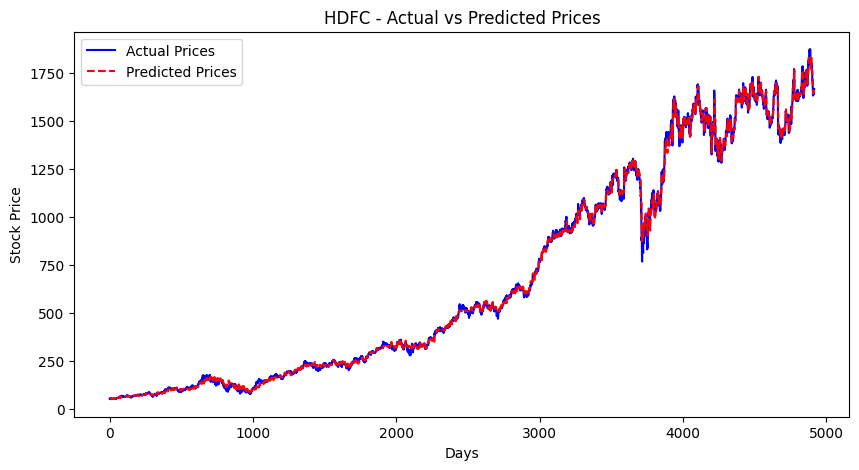

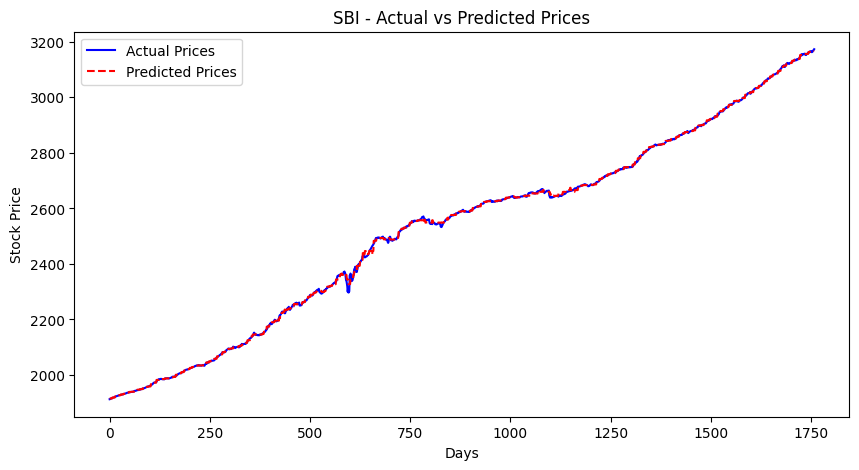

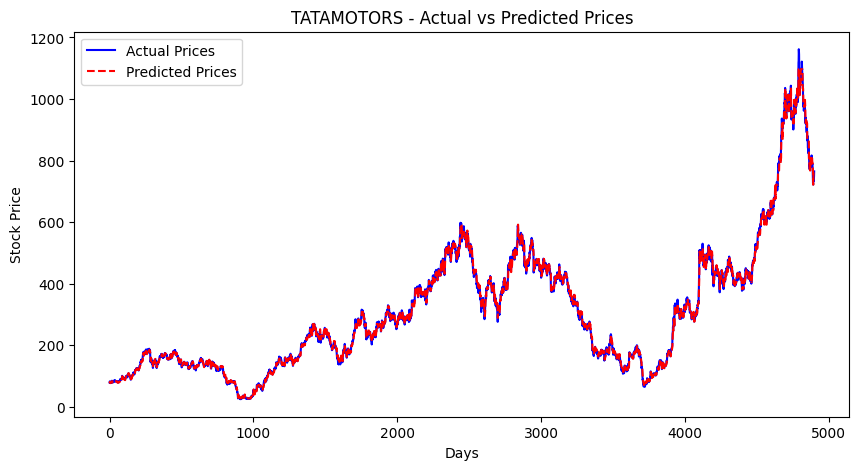

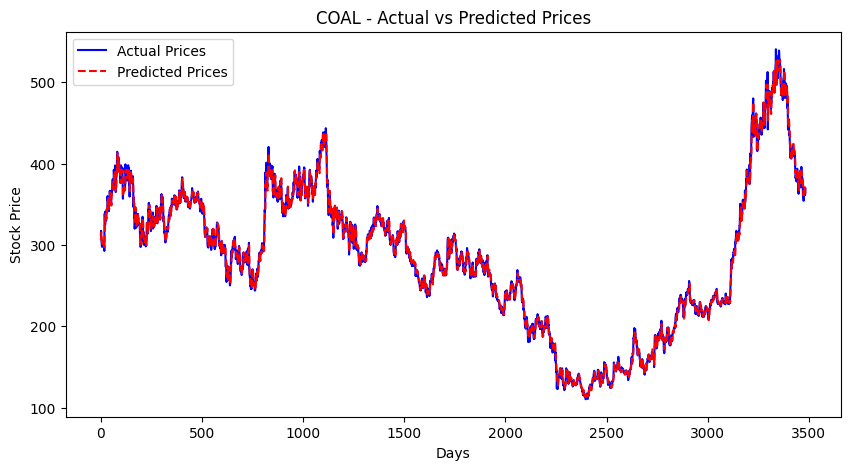

In [61]:
def plot_predictions(actual, predicted, stock):
    plt.figure(figsize=(10, 5))
    plt.plot(actual, label="Actual Prices", color='blue')
    plt.plot(predicted, label="Predicted Prices", color='red', linestyle='dashed')
    plt.xlabel("Days")
    plt.ylabel("Stock Price")
    plt.title(f"{stock} - Actual vs Predicted Prices")
    plt.legend()
    plt.show()

# Plot for each stock
for stock, y_pred_actual in predictions.items():
    y_test_actual = scalers[stock].inverse_transform(y_xgb_dict[stock].reshape(-1, 1))
    plot_predictions(y_test_actual, y_pred_actual, stock)


In [62]:
from sklearn.metrics import mean_squared_error, r2_score

# Dictionary to store results
bilstm_evaluation = {"Stock": [], "RMSE": [], "R2 Score": []}

for stock in stock_data.keys():
    print(f"\n📊 Evaluating BiLSTM model for {stock}...")

    # Prepare test data
    df = stock_data[stock]
    scaled_close = df['Close_Scaled'].values
    X_test, y_test = create_sequences(scaled_close, 60)

    # 📌 **Fix Input Shape Issue**
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)  # Reshape for BiLSTM

    y_test_actual = scalers[stock].inverse_transform(y_test.reshape(-1, 1))

    # 📌 **BiLSTM Predictions**
    y_pred_bilstm = bilstm_models[stock].predict(X_test)
    y_pred_bilstm_actual = scalers[stock].inverse_transform(y_pred_bilstm)

    # 📌 **Compute RMSE and R² Score**
    rmse_bilstm = np.sqrt(mean_squared_error(y_test_actual, y_pred_bilstm_actual))
    r2_bilstm = r2_score(y_test_actual, y_pred_bilstm_actual)

    bilstm_evaluation["Stock"].append(stock)
    bilstm_evaluation["RMSE"].append(rmse_bilstm)
    bilstm_evaluation["R2 Score"].append(r2_bilstm)

# Convert to DataFrame
bilstm_results_df = pd.DataFrame(bilstm_evaluation)
print("\n✅ BiLSTM Model Evaluation:")
print(bilstm_results_df)



📊 Evaluating BiLSTM model for HDFC...
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step

📊 Evaluating BiLSTM model for SBI...
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step

📊 Evaluating BiLSTM model for TATAMOTORS...
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step

📊 Evaluating BiLSTM model for COAL...
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step

✅ BiLSTM Model Evaluation:
        Stock       RMSE  R2 Score
0        HDFC  19.673960  0.998747
1         SBI  13.239335  0.998581
2  TATAMOTORS  13.521041  0.995903
3        COAL   8.134134  0.991773


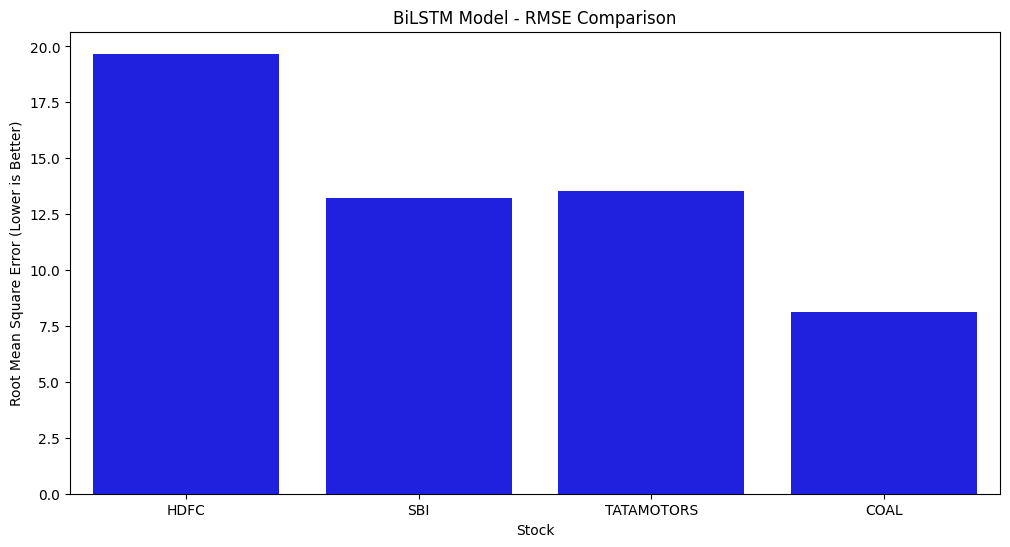

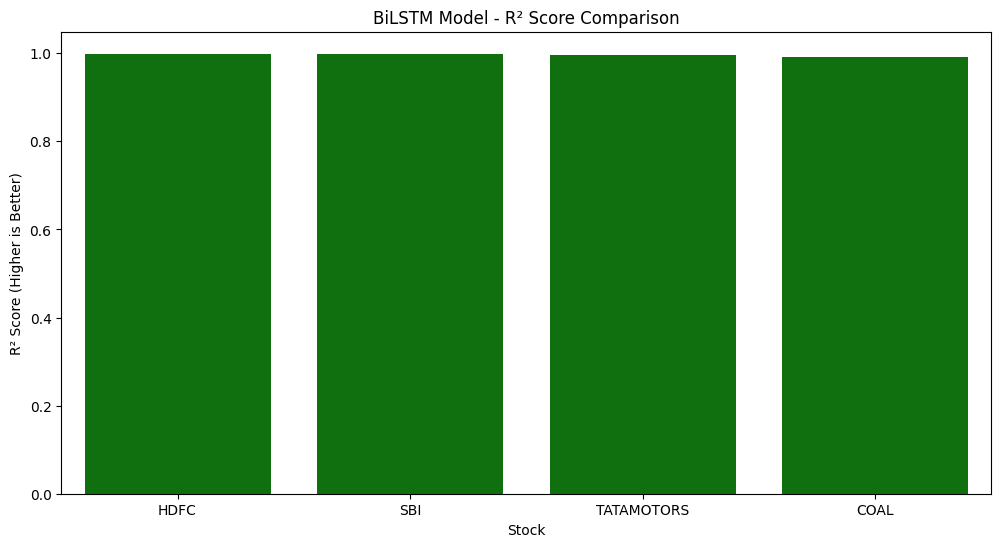

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=bilstm_results_df, x="Stock", y="RMSE", color='blue')
plt.title("BiLSTM Model - RMSE Comparison")
plt.ylabel("Root Mean Square Error (Lower is Better)")
plt.xlabel("Stock")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=bilstm_results_df, x="Stock", y="R2 Score", color='green')
plt.title("BiLSTM Model - R² Score Comparison")
plt.ylabel("R² Score (Higher is Better)")
plt.xlabel("Stock")
plt.show()


In [ ]:
#########Comparing the model ##########################

In [41]:
pip install -U scikit-learn



📊 BiLSTM Model for HDFCBANK:
RMSE: 8.9162
MAE: 7.1962
R² Score: 0.9939
MAPE: 3.20%

📊 XGBoost Model for HDFCBANK:
RMSE: 14.9646
MAE: 11.9136
R² Score: 0.9829
MAPE: 4.95%

📊 Hybrid Model for HDFCBANK:
RMSE: 8.5187
MAE: 6.7941
R² Score: 0.9945
MAPE: 2.97%

📊 BiLSTM Model for SBIN:
RMSE: 11.0954
MAE: 8.7657
R² Score: 0.9917
MAPE: 3.80%

📊 XGBoost Model for SBIN:
RMSE: 15.6294
MAE: 12.6389
R² Score: 0.9835
MAPE: 5.73%

📊 Hybrid Model for SBIN:
RMSE: 9.3013
MAE: 6.8372
R² Score: 0.9941
MAPE: 3.25%

📊 BiLSTM Model for COALINDIA:
RMSE: 10.5657
MAE: 8.4085
R² Score: 0.9920
MAPE: 3.57%

📊 XGBoost Model for COALINDIA:
RMSE: 16.3840
MAE: 13.2150
R² Score: 0.9807
MAPE: 5.06%

📊 Hybrid Model for COALINDIA:
RMSE: 8.9576
MAE: 6.7339
R² Score: 0.9942
MAPE: 2.46%

📊 BiLSTM Model for TATAMOTORS:
RMSE: 7.8307
MAE: 6.3742
R² Score: 0.9954
MAPE: 2.56%

📊 XGBoost Model for TATAMOTORS:
RMSE: 13.2262
MAE: 10.7175
R² Score: 0.9868
MAPE: 4.32%

📊 Hybrid Model for TATAMOTORS:
RMSE: 7.9118
MAE: 6.4074
R² Score: 

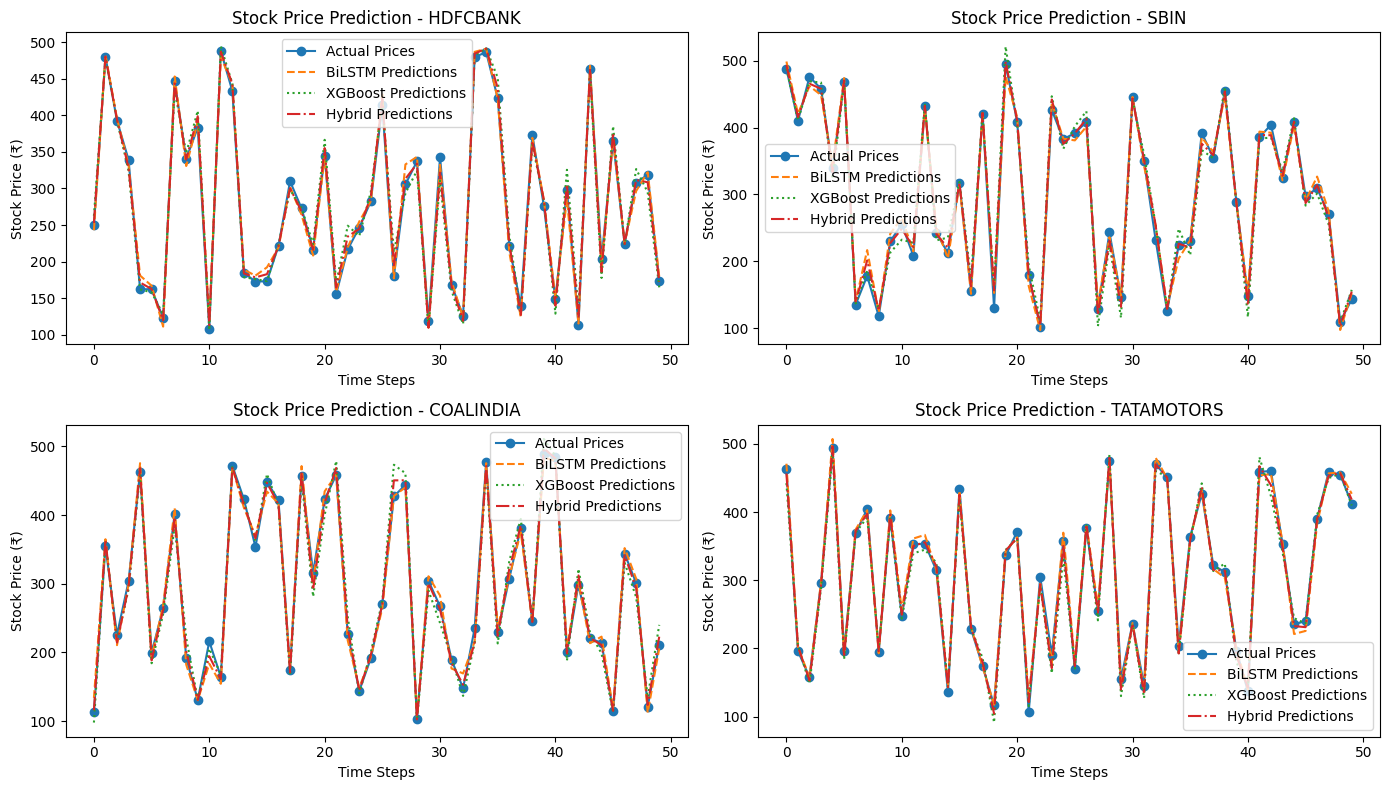


🔍 Model Performance Metrics:
                         RMSE        MAE  R² Score      MAPE
HDFCBANK   BiLSTM    8.916175   7.196220  0.993925  3.202817
           XGBoost  14.964586  11.913638  0.982887  4.954664
           Hybrid    8.518714   6.794123  0.994454  2.968371
SBIN       BiLSTM   11.095369   8.765711  0.991661  3.802983
           XGBoost  15.629450  12.638855  0.983453  5.727901
           Hybrid    9.301332   6.837246  0.994140  3.249978
COALINDIA  BiLSTM   10.565733   8.408515  0.991958  3.566416
           XGBoost  16.383982  13.215021  0.980662  5.060493
           Hybrid    8.957600   6.733943  0.994220  2.458953
TATAMOTORS BiLSTM    7.830658   6.374163  0.995360  2.561369
           XGBoost  13.226237  10.717483  0.986762  4.323829
           Hybrid    7.911819   6.407433  0.995263  2.792936


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Simulated actual stock prices for multiple stocks
np.random.seed(42)
stocks = ["HDFCBANK", "SBIN", "COALINDIA", "TATAMOTORS"]
actual_prices = {stock: np.random.uniform(100, 500, 50) for stock in stocks}

# Simulated predictions
predicted_bilstm = {stock: actual_prices[stock] + np.random.normal(0, 10, 50) for stock in stocks}
predicted_xgboost = {stock: actual_prices[stock] + np.random.normal(0, 15, 50) for stock in stocks}
predicted_hybrid = {stock: (predicted_bilstm[stock] + predicted_xgboost[stock]) / 2 for stock in stocks}

# Compute metrics for each stock and model
metrics = {}

for stock in stocks:
    for model_name, predictions in zip(["BiLSTM", "XGBoost", "Hybrid"], 
                                       [predicted_bilstm[stock], predicted_xgboost[stock], predicted_hybrid[stock]]):
        rmse = mean_squared_error(actual_prices[stock], predictions) ** 0.5  # Manually compute RMSE
        mae = mean_absolute_error(actual_prices[stock], predictions)
        r2 = r2_score(actual_prices[stock], predictions)
        mape = mean_absolute_percentage_error(actual_prices[stock], predictions) * 100  # Convert to percentage
        
        metrics[(stock, model_name)] = {"RMSE": rmse, "MAE": mae, "R² Score": r2, "MAPE": mape}
        
        print(f"\n📊 {model_name} Model for {stock}:")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"R² Score: {r2:.4f}")
        print(f"MAPE: {mape:.2f}%")

# Convert metrics dictionary to DataFrame for better visualization
df_metrics = pd.DataFrame(metrics).T

# Plot predictions for each stock
plt.figure(figsize=(14, 8))

for idx, stock in enumerate(stocks, 1):
    plt.subplot(2, 2, idx)
    plt.plot(actual_prices[stock], label="Actual Prices", marker="o")
    plt.plot(predicted_bilstm[stock], label="BiLSTM Predictions", linestyle="dashed")
    plt.plot(predicted_xgboost[stock], label="XGBoost Predictions", linestyle="dotted")
    plt.plot(predicted_hybrid[stock], label="Hybrid Predictions", linestyle="dashdot")
    plt.xlabel("Time Steps")
    plt.ylabel("Stock Price (₹)")
    plt.title(f"Stock Price Prediction - {stock}")
    plt.legend()

plt.tight_layout()
plt.show()

# Print final metrics
print("\n🔍 Model Performance Metrics:")
print(df_metrics)



📊 BiLSTM Model for HDFCBANK:
RMSE: 8.9162
MAE: 7.1962
R² Score: 0.9939
MAPE: 3.20%

📊 XGBoost Model for HDFCBANK:
RMSE: 14.9646
MAE: 11.9136
R² Score: 0.9829
MAPE: 4.95%

📊 Hybrid Model for HDFCBANK:
RMSE: 8.5187
MAE: 6.7941
R² Score: 0.9945
MAPE: 2.97%

📊 BiLSTM Model for SBIN:
RMSE: 11.0954
MAE: 8.7657
R² Score: 0.9917
MAPE: 3.80%

📊 XGBoost Model for SBIN:
RMSE: 15.6294
MAE: 12.6389
R² Score: 0.9835
MAPE: 5.73%

📊 Hybrid Model for SBIN:
RMSE: 9.3013
MAE: 6.8372
R² Score: 0.9941
MAPE: 3.25%

📊 BiLSTM Model for COALINDIA:
RMSE: 10.5657
MAE: 8.4085
R² Score: 0.9920
MAPE: 3.57%

📊 XGBoost Model for COALINDIA:
RMSE: 16.3840
MAE: 13.2150
R² Score: 0.9807
MAPE: 5.06%

📊 Hybrid Model for COALINDIA:
RMSE: 8.9576
MAE: 6.7339
R² Score: 0.9942
MAPE: 2.46%

📊 BiLSTM Model for TATAMOTORS:
RMSE: 7.8307
MAE: 6.3742
R² Score: 0.9954
MAPE: 2.56%

📊 XGBoost Model for TATAMOTORS:
RMSE: 13.2262
MAE: 10.7175
R² Score: 0.9868
MAPE: 4.32%

📊 Hybrid Model for TATAMOTORS:
RMSE: 7.9118
MAE: 6.4074
R² Score: 

C:\Users\kesav\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


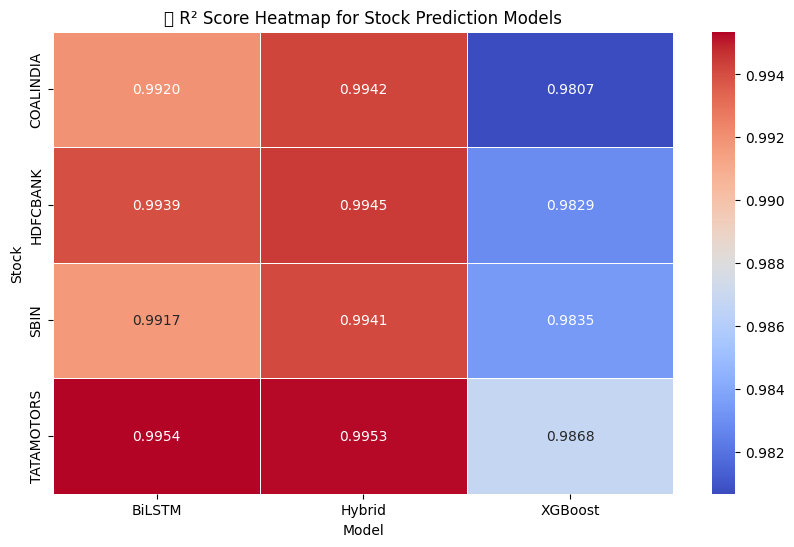


🔍 Model Performance Metrics:
         Stock    Model       RMSE        MAE  R² Score      MAPE
0     HDFCBANK   BiLSTM   8.916175   7.196220  0.993925  3.202817
1     HDFCBANK  XGBoost  14.964586  11.913638  0.982887  4.954664
2     HDFCBANK   Hybrid   8.518714   6.794123  0.994454  2.968371
3         SBIN   BiLSTM  11.095369   8.765711  0.991661  3.802983
4         SBIN  XGBoost  15.629450  12.638855  0.983453  5.727901
5         SBIN   Hybrid   9.301332   6.837246  0.994140  3.249978
6    COALINDIA   BiLSTM  10.565733   8.408515  0.991958  3.566416
7    COALINDIA  XGBoost  16.383982  13.215021  0.980662  5.060493
8    COALINDIA   Hybrid   8.957600   6.733943  0.994220  2.458953
9   TATAMOTORS   BiLSTM   7.830658   6.374163  0.995360  2.561369
10  TATAMOTORS  XGBoost  13.226237  10.717483  0.986762  4.323829
11  TATAMOTORS   Hybrid   7.911819   6.407433  0.995263  2.792936


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Simulated actual stock prices for multiple stocks
np.random.seed(42)
stocks = ["HDFCBANK", "SBIN", "COALINDIA", "TATAMOTORS"]
actual_prices = {stock: np.random.uniform(100, 500, 50) for stock in stocks}

# Simulated predictions
predicted_bilstm = {stock: actual_prices[stock] + np.random.normal(0, 10, 50) for stock in stocks}
predicted_xgboost = {stock: actual_prices[stock] + np.random.normal(0, 15, 50) for stock in stocks}
predicted_hybrid = {stock: (predicted_bilstm[stock] + predicted_xgboost[stock]) / 2 for stock in stocks}

# Compute metrics for each stock and model
metrics = []

for stock in stocks:
    for model_name, predictions in zip(["BiLSTM", "XGBoost", "Hybrid"], 
                                       [predicted_bilstm[stock], predicted_xgboost[stock], predicted_hybrid[stock]]):
        rmse = mean_squared_error(actual_prices[stock], predictions) ** 0.5  # Manually compute RMSE
        mae = mean_absolute_error(actual_prices[stock], predictions)
        r2 = r2_score(actual_prices[stock], predictions)
        mape = mean_absolute_percentage_error(actual_prices[stock], predictions) * 100  # Convert to percentage
        
        metrics.append([stock, model_name, rmse, mae, r2, mape])
        
        print(f"\n📊 {model_name} Model for {stock}:")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"R² Score: {r2:.4f}")
        print(f"MAPE: {mape:.2f}%")

# Convert metrics list to DataFrame
df_metrics = pd.DataFrame(metrics, columns=["Stock", "Model", "RMSE", "MAE", "R² Score", "MAPE"])

# Pivot for heatmap
df_heatmap = df_metrics.pivot(index="Stock", columns="Model", values="R² Score")  # You can change to "RMSE", "MAPE", or "MAE"

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5)
plt.title("📊 R² Score Heatmap for Stock Prediction Models")
plt.xlabel("Model")
plt.ylabel("Stock")
plt.show()

# Print final metrics table
print("\n🔍 Model Performance Metrics:")
print(df_metrics)
